Let's say you walk into a casino...

once again, gambling is bad. Do not gamble. We do not encourage gambling.

...

Let's just say hypothetically, you walk into a casino

And you see a table, where two AIs are playing connect 4.

The rule of that gambling table: you are allowed to take a glance at the game board when the game is ongoing, but just one glance, a random one too. You have the information of all the pieces on the board. And then you are going to bet on, who is going to win the game.

It looks like you need to make a decision, about who to bet on, based on a single snapshot of the game board.

We will use a decision tree for this. But before we go there, let's use decision tree on some easier, standard stuff.

#OLD STUFF

Following are old stuff from previous homework. It is here because we are basing some of our new work on them.

Advice:: click on the small triangle right beside the title "OLD STUFF" and minimize them all.

The following is my answer to the connect4 work problem. Your
answer might  very well be better than mine. For now, please bear with me and use my version.

(Consider this as a practice about using others' code)

Also, note that many code are currently commented out. I will explain why in a bit

In [1]:
import numpy as np

ROW_COUNT = 6
COLUMN_COUNT = 7

def create_board():
    board = np.zeros((ROW_COUNT,COLUMN_COUNT))
    return board

def print_board(board):
    print(np.flip(board,0))

Some constants to keep for the game to work. Run the code below, you should get an empty board,

In [2]:
def init_game():
    board = create_board()
    print_board(board)
    game_over = False
    turn = 0
    ##ATTENTION:: this function returns 3 things at the same time
    return board, game_over, turn

##ATTENTION:: the 3 returned values are stored in some global variables
board, game_over, turn = init_game()

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [3]:

def is_valid_location(board,col):
    #if this condition is true we will let the use drop piece here.
    #if not true that means the col is not vacant
    return board[ROW_COUNT - 1][col]==0

Once a column decide on the column to drop, we will want to know which row is the next open row. In other words, if we drop a piece in this column ```col```, which row will the piece fall onto because of gravity.

In [4]:
def get_next_open_row(board,col):
    ##TODO
    for r in range(ROW_COUNT):
        if board[r][col]==0:
            return r
    return -1

once we decide on the column ```col``` and know the row ```row```, we can use the function below to drop a piece.

In [5]:
def drop_piece(board,row,col,piece):
    # print(row)
    # print(col)
    # print(board)
    # print(board[row][col])
    board[row][col]= piece

First implement ```winning``` to check whether a player's ```piece``` wins

In [6]:
def winning(board, piece):
    # Check horizontal locations for win
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT):
            if board[r][c] == piece and board[r][c+1] == piece and board[r][c+2] == piece and board[r][c+3] == piece:
                return True

    # Check vertical locations for win
    ##TODO
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT-3):
            if board[r][c] == piece and board[r+1][c] == piece and board[r+2][c] == piece and board[r+3][c] == piece:
                return True

    # Check positively sloped diaganols
    ##TODO
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT-3):
            if board[r][c] == piece and board[r+1][c+1] == piece and board[r+2][c+2] == piece and board[r+3][c+3] == piece:
                return True

    # Check negatively sloped diaganols
    ##TODO
    for c in range(COLUMN_COUNT-3):
        for r in range(3, ROW_COUNT):
            if board[r][c] == piece and board[r-1][c+1] == piece and board[r-2][c+2] == piece and board[r-3][c+3] == piece:
                return True
    return False

also implement a function ```no_valid_location``` to check if there is no more places to drop pieces. Assuming that no one wins and there is no more places to drop pieces, then the game ends in a draw.


In [7]:
def no_valid_location(board):
    ##TODO
    for each_col in range(COLUMN_COUNT):
        if is_valid_location(board, each_col):
            return False
    return True

Now modify your `run_game_v1` to implement ```run_game_v3```, with winning and draw detection integrated. Also, throw an error and halt the game when a player inputs an invalid value.

We are not modifying from `run_game_v2`

Hint, read about how to throw an error here: https://rollbar.com/blog/throwing-exceptions-in-python/

In [8]:
def run_game_v3(board, game_over, turn):
    ##TODO
    while not game_over:
        #Ask for player 1 input
        if turn == 0:
            col = int(input("Player 1, Make your Selection(0-6):"))
            #Player 1 will drop a piece on the board
            if is_valid_location(board,col):
                row = get_next_open_row(board,col)
                drop_piece(board,row,col,1)

            else:
                raise Exception("Player 1 made invalid move")

        #Ask for player 2 input
        else:
            col = int(input("Player 2, Make your Selection(0-6):"))
            #Player 2 will drop a piece on the board
            if is_valid_location(board,col):
                row = get_next_open_row(board,col)
                drop_piece(board,row,col,2)
            else:
                raise Exception("Player 2 made invalid move")
        print_board(board)

        if winning(board, 1):
            print("player 1 wins")
            break
        elif winning(board, 2):
            print("player 2 wins")
            break
        elif no_valid_location(board):
            print("game draws!!!")
            break
        turn += 1
        turn = turn % 2

##not new Stuff Below


Now the game is ready to play for human. Let's make the game ready to play for AI.

First, let's think about what constitute a game state. You may use/call functions in the section `OLD STUFF`

In [9]:
import operator

class State:
    """Represents the state in the Connect4 problem."""

    def __init__(self, board):
        self.board = board
        self.last_move_col = None

    def set_last(self, col):
        self.last_move_col = col

    def is_valid_location(self, col):
        ##TODO
        return is_valid_location(self.board,col)

    def get_next_open_row(self, col):
        ##TODO
        return get_next_open_row(self.board, col)

    def drop_piece(self,row,col, player_piece):
        #TODO
        drop_piece(self.board, row, col, player_piece)
        self.last_move_col = col
        # if(self.currentPlaying == self.player1):
        #     self.currentPlaying = self.player2
        # else:
        #     self.currentPlaying = self.player1

    def winning(self, player_piece):
        if winning(self.board, player_piece):
            return True
        return False
    def no_valid_location(self):
        return no_valid_location(self.board)
    def __repr__(self):
        return str(np.flip(self.board,0))

    def __str__(self):
        return str(np.flip(self.board,0))

    def __eq__(self, other):
        ##TODO
        return isinstance(other, State) and np.equals(self.board, other.board)

    def __hash__(self):
        return hash(self.board)

    @staticmethod
    def __ensure_instance_of_state(other):
        if not isinstance(other, State):
            raise ValueError(str(other) + " must be an instance of State")

Basically, we are rethinking the ``board'' as a state, and all the previously built functions that apply to board now should apply to state. This may be a little bit of redundant and many places we may be reusing the same code, or calling the same function. In general, this is **bad** coding practice. But this is OK for now, for several reasons:

1. We didn't know we are building State when we built Board. In fact, we could possibly delete the definitions about Board and only keep the ones about State.

2. But we are not doing that for now, because this is not a coding class. It is part of my intention to keep the old files so you can refer to them while coding new things.

3. With that being said, you should know what is more elegant, and you are welcome to practice building elegant programs. It is not required but welcome. If you do clean up, make sure your code still runs.

OK, now we can set up some example states, and also a state representing the beginning of a game.

At least one of your example states should contain a state right before a winning move. In other words, the current playing player of the state has a winning move to make in that state.

In [10]:

#a function to create new state, make things easier for you
def make_new_state(input):
    return State(np.flip(np.asarray(input),0))

#TODO
#build an example_state where a player will win in a single move.
#We will use this example_state to test our other methods later
example_state = State(
    np.flip(
    np.asarray([[0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 2, 0, 0, 0, 0],
    [0, 2, 1, 2, 0, 0, 0],
    [2, 1, 1, 1, 0, 0, 0]]),0))

#TODO
initial_state = State(create_board())

Print out your states below to make sure they really are what you expected.

In [11]:
initial_state

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

In [12]:
example_state

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 2 1 2 0 0 0]
 [2 1 1 1 0 0 0]]

OK, at this point, you may realize that, we are redoing the stuff with state in the missionaries_cannibals problem, but now with the context of connect4.

Next we are going to continue building functions related to states. As you are doing so, think about WHY you are doing them, what is the end goal?

In [13]:
import copy
"""input: a single state
  output: a list of all reachable state from the input state
"""
def get_next_states(current_state,player_piece):
  next_states = []
  #TODO
  for each_column in range(COLUMN_COUNT):
    nor = current_state.get_next_open_row(each_column)
    if nor == -1:
        continue
    else:
        clone = copy.deepcopy(current_state)
        # print(clone)
        # print("nor",nor)
        clone.drop_piece(nor, each_column,player_piece)
        # clone.set_last(each_column)
        next_states.append(clone)
        # print(next_states)
  return next_states

Check your function by running the following, also running it with your example state.

In [14]:
get_next_states(initial_state,1)

[[[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]],
 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0.]],
 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]],
 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]],
 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]],
 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]],
 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0

In [15]:
get_next_states(example_state,1)

[[[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 2 0 0 0 0]
  [1 2 1 2 0 0 0]
  [2 1 1 1 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 1 2 0 0 0 0]
  [0 2 1 2 0 0 0]
  [2 1 1 1 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]
  [0 0 2 0 0 0 0]
  [0 2 1 2 0 0 0]
  [2 1 1 1 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 2 1 0 0 0]
  [0 2 1 2 0 0 0]
  [2 1 1 1 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 2 0 0 0 0]
  [0 2 1 2 0 0 0]
  [2 1 1 1 1 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 2 0 0 0 0]
  [0 2 1 2 0 0 0]
  [2 1 1 1 0 1 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 2 0 0 0 0]
  [0 2 1 2 0 0 0]
  [2 1 1 1 0 0 1]]]

TODO

Make sure you are getting the next states as expected.

By this point, you may realize that, we haven't write any test cases or assertion statement. This once again is a bad practice, but for the same reasons we have discussed before. We are skipping that now.

One more reason for not writing test cases when building AI programs, especially more complex AI programs (which you will do soon), is that we don't really know the expected behavior sometimes. It could be a good research project, about writing test cases for AI projects.

Next, let's implement a breadth first search. Use an accumulator style, where we accumulate all nodes visited so far. If you are stuck, read the next text block.



In [16]:
candidate_states = [initial_state]
##TODO
##Input: List of states
##output: true or false, whether the goal state can be reached
##For convenience, print a message indicating "true"/"false" before returning the boolean output
def search_for_goal(candidate_states):
  ##TODO
  print("lose! Cannot reach goal state")
  return False
search_for_goal(candidate_states)

lose! Cannot reach goal state


False

If you are stuck, read the next text block...

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

OK, you are here.

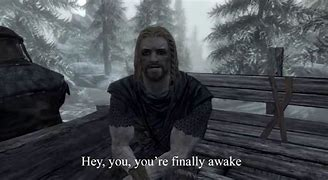

TODO::

State here how you accomplish the earlier task. If you can't do the task, state why. Or, why the earlier task doesn't make sense in the context of connect4.

Now that you are aware of the difficulty ahead, let's take one step back and make an easier function, `random_move()` which gives us a random next move. I am doing this one for you

In [17]:
from IPython.utils.path import random

def random_move(candidate_state, player_piece):
    all_next = get_next_states(candidate_state,player_piece)
    return random.choice(all_next)

Now we have two ways to move forward:

1. Instead of implementing a BFS for one player to search through all steps, implement a one-step BFS, or a search for the immediate next step. If there is a winning move, make that move; If there is no winning move, return None.

With this, we can build an AI that tries to win if there is an immediate winning step, and makes random move if there is none immediate winning steps.

2. The harder step. Min-max algorithm. We will talk about this later.

Let's take the first approach for now

In [18]:
##Input: one state
##output: the next state.
##If input state can reach a winning state, the winning state should be returned.
def search_for_goal(candidate_state, player_piece):
    #TODO

    all_next = get_next_states(candidate_state, player_piece)
    for each_next_state in all_next:
        if each_next_state.winning(player_piece):
            return each_next_state

    return None


TODO

Test your `search_for_goal()` on your example state that has a winning move. Check to see if the winning move is correctly found by your `search_for_goal()`

In [19]:
print(search_for_goal(example_state, 1).winning(1))

True


In [20]:
search_for_goal(example_state, 1)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 2 1 2 0 0 0]
 [2 1 1 1 1 0 0]]

In [21]:
print(initial_state.winning(1))

False


In [22]:
print(make_new_state([[0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 2, 0, 0, 0],
    [0, 0, 2, 1, 0, 0, 0],
    [0, 2, 1, 2, 0, 0, 0],
    [2, 1, 1, 1, 0, 0, 0]]).winning(2))

True


OK. We now have a mechanism to output the next state. Let's build an AI based on this.

##Your first game playing AI

I am going to build AI00, which is just a random move AI. You will build the next one.

Let's call it AI01

In [23]:
class AI00:
    def __init__(self, player_symbol):
        self.player_symbol = player_symbol
    def make_move(self, state):
        if state.no_valid_location():
            return None
        return random_move(state, self.player_symbol)


build an AI that tries to win if there is an immediate winning step, and makes random move if there is none immediate winning steps.

In [24]:
class AI01:
    def __init__(self, player_symbol):
        self.player_symbol = player_symbol
    ##TODO
    def make_move(self, state):
        if state.no_valid_location():
            return None
        else:
            potential_choice =  search_for_goal(state, self.player_symbol)
            if potential_choice == None:
                return random_move(state, self.player_symbol)
            else:
                return potential_choice


Now, we have our first AI ready, we want to play with it in a connect4 game. To make this happen, we are going to implement a manager class tha manages the game flow for us.

In [25]:
#This will make sense later. It is used for debugging
allowed = True
def play_print(msg):
    if(allowed):
        print(msg)

In [26]:
#This should make sense now.
class GM:
    def __init__(self, player1, player2):
        self.player1 = player1
        self.player2 = player2
        self.board = State(create_board())

        self.ongoing = True
        self.turn = 1 #turn number
        self.current_player = player1.player_symbol

    def play(self):
        while self.ongoing:
            play_print("Turn # "+ str(self.turn))
            self.turn += 1
            if self.current_player == self.player1.player_symbol:
                self.board = self.player1.make_move(self.board)
            else:
                self.board = self.player2.make_move(self.board)
            play_print(self.board)
            if self.board.winning(self.current_player) != False:
                play_print("Player " + str(self.current_player) +"Won!")
                self.ongoing = False
                return self.current_player
            if self.current_player == self.player1.player_symbol:
                self.current_player = self.player2.player_symbol
            else:
                self.current_player = self.player1.player_symbol

            if self.board.no_valid_location():
                play_print("Draw!")
                self.ongoing = False
                return 0



Now use code to set up two AI01 players, and have they play against each other.

In [27]:
#TODO run the following. If you have done everything correctly,
#this should play out a game for you
GM(AI01(1),AI01(2)).play()


Turn # 1
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
Turn # 2
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 1.]]
Turn # 3
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 1. 0. 0. 0. 1.]]
Turn # 4
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 1. 2. 0. 0. 1.]]
Turn # 5
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 2. 1. 2. 0. 0. 1.]]
Turn # 6
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0. 0. 0.]
 [0. 2. 1. 2. 0. 0. 1.]]
Turn # 7
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.

1

Now, since both player are playing at random, let's run our simulation 100 times and see who wins more.

By changing this flag `allowed` to `False`, now we are not printing the game as the simulation happens.

In [28]:
def hundred_battle(player1, player2, count = 100):
    global allowed
    allowed = False
    player1wins = 0
    player2wins = 0
    for i in range(count):
        winner = GM(player1,player2).play()
        if winner == player1.player_symbol:
            player1wins += 1
        elif winner == player2.player_symbol:
            player2wins += 1

    print(player1wins)
    print(player2wins)


TODO run the following

In [29]:
allowed = False

In [30]:
hundred_battle(AI01(1),AI01(2))

59
41


I got player1 winning 60 out of 40 games.

I wonder why.

Let's try more simulated games, where you have

AI00 vs AI00

AI00 vs AI01

TODO:: run the following multiple code segments.

In [31]:
hundred_battle(AI00(1),AI00(2))

57
43


In [32]:
hundred_battle(AI00(1),AI01(2))

27
73


In [33]:
hundred_battle(AI01(1),AI01(2))

60
40


#New Stuff Starts here

#The iris data set

Roses are red, violets are blue,
But the iris, oh iris, how it outshines the view.

--ChatGPT, 09/22/2023

We are going to start with the iris data set. It's like the hello world of AI programs. Run the following code will import the data set.

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()
Xs = iris['data']
ys = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

Note that there is a correspondence between X and y. Look up what the data are, https://www.kaggle.com/datasets/vikrishnan/iris-dataset

Look at the data, look at your X and y, make sense of what each stands for.

DONE::

Add a few code cells below, to explore what are the values look like in X, y, names, and feature_names. Leave the results in your notebook

In [35]:
print("Xs:")
print(Xs[0:10])
print("ys:")
print(ys)
print("target_names:")
print(names)
print("feature_names:")
print(feature_names)

Xs:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
ys:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target_names:
['setosa' 'versicolor' 'virginica']
feature_names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


DONE::

use online resources to learn about the data set and make sense out of what they mean. Write down your understandings. For example: what are we trying to predict (y?), based on what information?

An important step of being an AI researcher/practitioner or a data scientist is knowing what kind of task domain or data set you are working with. You may have the perfect algorithm, but if you don't understand the task at hand, you will not do a good job on it.

The 'iris' dataset includes data on different species of the Iris plant. In the dataset there are four attributes, the 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'. A sepal is green and leaflike part of the iris that encloses the petals of the plant.

Each attribute has a numeric value, we use those values to predict what species of iris the combination of the given attributes might be.

There are only three target values the prediction can be. Those are 'setosa', 'versicolor', or 'virginica'. With each being represented by a 0, 1, or 2.

DONE:: Make sense out of the following code. If you did your previous 2 TODOs properly, you can understand it just fine. Run it and look at the result. What do you discover? Discuss your discovery below the output.

Feel free to utilize things you learned elsewhere, e.g. data analytics course, statistics course, ... If you don't think you know any prior knowledge related to this, use your intuition.

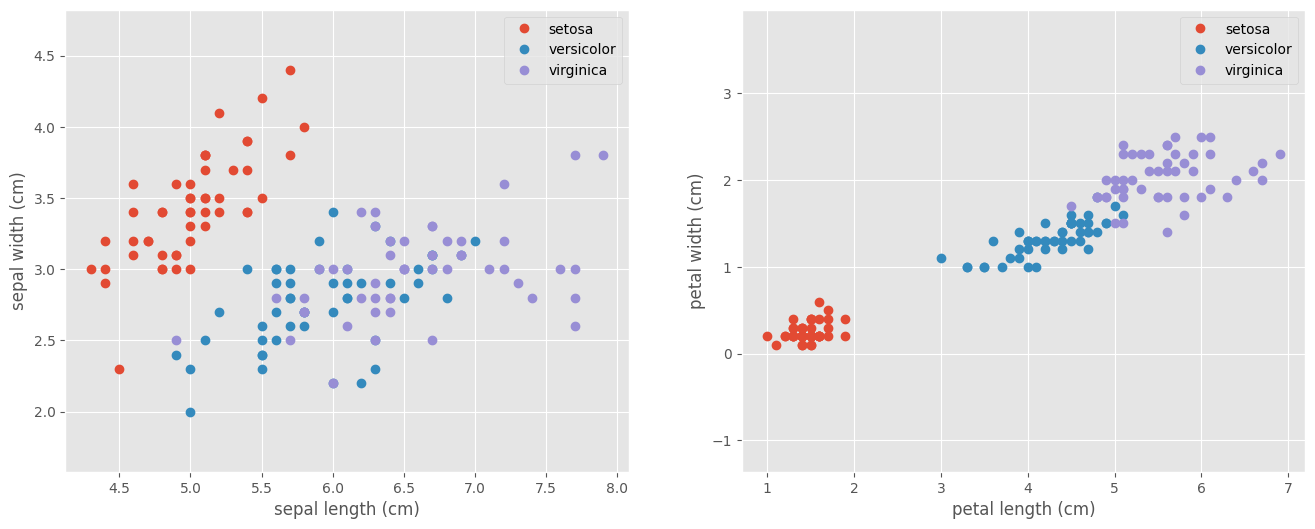

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = Xs[ys == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = Xs[ys == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

DONE:: Discuss here


The outputs are two scatter plots. The first figure shows the relationship between sepal length and sepal width. The second figure shows the relationship between petal length and petal width.

In both figures there is a clear cluster of setosas. This is helpful because it reveals a clear relationship between the sepal length and sepal width and the petal length and petal width that likely results in a setosa.

The other discovery is that the relationship between petal length and petal width is more helpful is deciding which given iris is a versicolor and a virginica because that relationship creates two clear clusters of versicolor and virginica.

#Decision Tree


This section is adapted from

https://github.com/VictorYXL/Machine_Learning/blob/master/Classification%20and%20Regression%20Tree/ModelTree.py

Feel free to look at this, but it won't give you an answer easier than you think from scratch :)


Use the Node class below. This will represent one node in a decision tree. For this assignment, we will assume that if a node has feature f and value v, then all samples whose values for feature f is less than **OR equal to** v will be on the left, and the other samples (whose values for feature f is more than v) will be on the right of the node.

In [37]:
class Node:
    def __init__(self, feature, value, left, right):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
## This is a helper function to print the tree for you, so you may debug with it
def showTree(tree):
    print(tree, tree.left, tree.right)
    print(tree.feature, tree.value)
    if (tree.left != None):
        showTree(tree.left)
    if (tree.right != None):
        showTree(tree.right)

##Naive Decision Tree

###TDI00

Let's follow the lecture slide's pseudocode to implement our decision tree learning process.

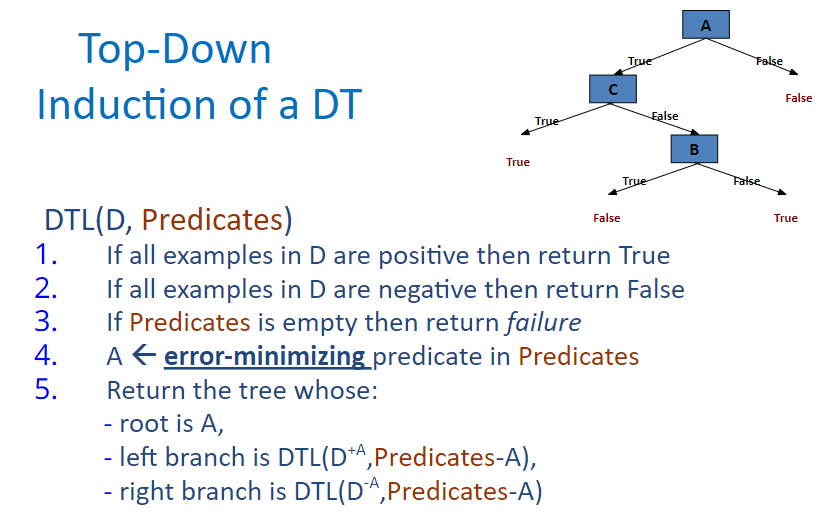

There are a few issues when implementing this algorithm for our task.

For example, step 3 says "if Predicates is empty then return failure".

You know what? Let's follow the pseudocode by the book, for now.

Return None for a failure in step 3.

HARD DONE:: Build your first decision tree below, following the pseudocode from the slide above

I left a few print commands in this function to help you debug. Do not remove them as you work through it on your first try.

In [38]:
from os.path import split
import math

def TDI00(Xs, ys, predicates):
    ## step 1 and 2, I do half of it for you.
    ##DONE you need to implement sameClass() below to make it work.
    print(ys)
    if(len(ys) == 0):
        print("check", Xs)
        return Node(None,None,None,None)

    if (sameClass(ys)):
        return Node(None, ys[0], None, None)


    ## step 3.
    if (len(predicates)==0): ##DONE build the condition for `if` here.
        print("FAILURE")
        return None
    ## step 4
    feature, value = ChooseMinErrorPred(Xs, ys, predicates)
    ## step 5
    print("branching feature and its value")
    print(feature, value)
    predicate_index = predicates.index(feature)
    restPredicates = predicates[:predicate_index] + predicates[predicate_index+1:]
    print(restPredicates)
    ## step 6
    leftXs, rightXs, leftys, rightys = splits(Xs, ys, feature, value)
    print("Left: ")
    print(leftXs, leftys)
    print("Right: ")
    print(rightXs, rightys)
    #DONE what should this function return
    return Node(feature,value,TDI00(leftXs,leftys,restPredicates),TDI00(rightXs,rightys,restPredicates))


## A function that takes in Xs and ys, and split them into two half based on feature for value
##return leftXs, leftys, data points whose feature is less than OR EQUAL TO the value
##also return rightXs, rightys, data points whose feature is more than the value.

def splits(Xs, ys, feature, value):
    #DONE
    leftXs = [] #DONE
    rightXs = [] #DONE
    leftys = [] #DONE
    rightys = [] #DONE

    for i in range(len(Xs)):
      if Xs[i][feature] <= value:
        leftXs.append(Xs[i])
        leftys.append(ys[i])
      elif Xs[i][feature] > value:
        rightXs.append(Xs[i])
        rightys.append(ys[i])

    return leftXs, rightXs, leftys, rightys

## return true if all the values in ys are the same
def sameClass(ys):
    #DONE
    same = True
    for i in range(len(ys)):
      if ys[i] != ys[0]:
        same = False
    return same

def ChooseMinErrorPred(Xs, ys, predicates):
    dataCount = len(Xs)
    if (dataCount == 0):
        return None, None
    minError = np.inf
    bestFeature = 0
    bestValue = Xs[0][0]
    #Loop for each feature and value to find the best match to reduce the error
    for feature in predicates:
        valueList = [X[feature] for X in Xs]
        valueSet = set(valueList)
        for value in valueSet:
            ##DONE split using feature and value pair
            ## calculate the entropy using the function below
            leftXs, rightXs, leftys, rightys = splits(Xs, ys, feature, value)

            entropyOfLeft = entropyOfaBranch(leftys)
            entropyOfRight = entropyOfaBranch(rightys)
            totalEntropy = entropyOfLeft + entropyOfRight

            # FOR DEBUGGING
            #print(feature,value,totalEntropy)

            if totalEntropy < minError:
                minError = totalEntropy
                bestFeature = feature
                bestValue = value

    return bestFeature, bestValue

#the comment below is called python docstring
#It's the better standard, than the sloppy comments I have been using
#so I am going to adapt to that.

def entropyOfaBranch(ys):
    """
    input:
    ys, a list of labels on one branch in a decision tree

    output: entropy, a float
    """
    totalResult = 0
    if (len(ys) == 0):
        return 0

    ##DONE, do your math here.

    countOf0 = 0
    countOf1 = 0
    countOf2 = 0

    for y in ys:
      if y == 0:
        countOf0 = countOf0 + 1
      elif y == 1:
        countOf1 = countOf1 + 1
      else:
        countOf2 = countOf2 + 1


    probOf0 = countOf0/len(ys)
    probOf1 = countOf1/len(ys)
    probOf2 = countOf2/len(ys)

    epsilon = 1e-100

    smoothed_prob0 = probOf0 + epsilon
    smoothed_prob1 = probOf1 + epsilon
    smoothed_prob2 = probOf2 + epsilon
                                                        # used ChatGPT to help handle zeros when calculating entropy


    totalResult = -probOf0 * math.log2(smoothed_prob0) - probOf1 * math.log2(smoothed_prob1) - probOf2 * math.log2(smoothed_prob2)

    return totalResult





IMPORTANT NOTE::

Depends on whether you "weight" your entropy based on the size of branches, your entropy calculation might give a slightly different score for a branching feature-value pair. Because of this, the final tree will be different.

In my experiment here, I did not apply weight, in other words, I weight all branches equally without considering their sizes. For our purpose of learning here, do not apply weight may be easier.

If you did apply weight, that's OK, you will have similar result, your tree will also perform good. Except that there will be one test case below, where mine fails, but yours will be OK.

In [39]:
predicates = list(range(len(Xs[0])))
ChooseMinErrorPred(Xs,ys,predicates)

(2, 1.9)

In [40]:
#Checks to make sure splits is splitting correctly
splits(Xs,ys,2,1.9)

([array([5.1, 3.5, 1.4, 0.2]),
  array([4.9, 3. , 1.4, 0.2]),
  array([4.7, 3.2, 1.3, 0.2]),
  array([4.6, 3.1, 1.5, 0.2]),
  array([5. , 3.6, 1.4, 0.2]),
  array([5.4, 3.9, 1.7, 0.4]),
  array([4.6, 3.4, 1.4, 0.3]),
  array([5. , 3.4, 1.5, 0.2]),
  array([4.4, 2.9, 1.4, 0.2]),
  array([4.9, 3.1, 1.5, 0.1]),
  array([5.4, 3.7, 1.5, 0.2]),
  array([4.8, 3.4, 1.6, 0.2]),
  array([4.8, 3. , 1.4, 0.1]),
  array([4.3, 3. , 1.1, 0.1]),
  array([5.8, 4. , 1.2, 0.2]),
  array([5.7, 4.4, 1.5, 0.4]),
  array([5.4, 3.9, 1.3, 0.4]),
  array([5.1, 3.5, 1.4, 0.3]),
  array([5.7, 3.8, 1.7, 0.3]),
  array([5.1, 3.8, 1.5, 0.3]),
  array([5.4, 3.4, 1.7, 0.2]),
  array([5.1, 3.7, 1.5, 0.4]),
  array([4.6, 3.6, 1. , 0.2]),
  array([5.1, 3.3, 1.7, 0.5]),
  array([4.8, 3.4, 1.9, 0.2]),
  array([5. , 3. , 1.6, 0.2]),
  array([5. , 3.4, 1.6, 0.4]),
  array([5.2, 3.5, 1.5, 0.2]),
  array([5.2, 3.4, 1.4, 0.2]),
  array([4.7, 3.2, 1.6, 0.2]),
  array([4.8, 3.1, 1.6, 0.2]),
  array([5.4, 3.4, 1.5, 0.4]),
  array(

In [41]:
list(range(len(Xs[0])))

[0, 1, 2, 3]

In [42]:
predicates = list(range(len(Xs[0])))
tree00 = TDI00(Xs, ys, predicates)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
branching feature and its value
2 1.9
[0, 1, 3]
Left: 
[array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3. , 1.4, 0.1]), array([4.3, 3. , 1.1, 0.1]), array([5.8, 4. , 1.2, 0.2]), array([5.7, 4.4, 1.5, 0.4]), array([5.4, 3.9, 1.3, 0.4]), array([5.1, 3.5, 1.4, 0.3]), array([5.7, 3.8, 1.7, 0.3]), array([5.1, 3.8, 1.5, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), 

In [43]:
showTree(tree00)

<__main__.Node object at 0x7a1779b516c0> <__main__.Node object at 0x7a1779b52e60> <__main__.Node object at 0x7a1779b51540>
2 1.9
<__main__.Node object at 0x7a1779b52e60> None None
None 0
<__main__.Node object at 0x7a1779b51540> <__main__.Node object at 0x7a1779b52170> <__main__.Node object at 0x7a1779b517b0>
3 1.7
<__main__.Node object at 0x7a1779b52170> <__main__.Node object at 0x7a1779b51ff0> <__main__.Node object at 0x7a1779b52b60>
0 7.0
<__main__.Node object at 0x7a1779b51ff0> None <__main__.Node object at 0x7a1779b51d50>
1 3.4
<__main__.Node object at 0x7a1779b51d50> None None
None None
<__main__.Node object at 0x7a1779b52b60> None None
None 2
<__main__.Node object at 0x7a1779b517b0> <__main__.Node object at 0x7a1779b51ab0> <__main__.Node object at 0x7a1779b53190>
0 7.9
<__main__.Node object at 0x7a1779b51ab0> None <__main__.Node object at 0x7a1779b51840>
1 3.8
<__main__.Node object at 0x7a1779b51840> None None
None None
<__main__.Node object at 0x7a1779b53190> None None
None None

This is the output of my TDI00()'s prints.

```
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
branching feature and its value
2 1.9
Left:
[array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3. , 1.4, 0.1]), array([4.3, 3. , 1.1, 0.1]), array([5.8, 4. , 1.2, 0.2]), array([5.7, 4.4, 1.5, 0.4]), array([5.4, 3.9, 1.3, 0.4]), array([5.1, 3.5, 1.4, 0.3]), array([5.7, 3.8, 1.7, 0.3]), array([5.1, 3.8, 1.5, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([4.6, 3.6, 1. , 0.2]), array([5.1, 3.3, 1.7, 0.5]), array([4.8, 3.4, 1.9, 0.2]), array([5. , 3. , 1.6, 0.2]), array([5. , 3.4, 1.6, 0.4]), array([5.2, 3.5, 1.5, 0.2]), array([5.2, 3.4, 1.4, 0.2]), array([4.7, 3.2, 1.6, 0.2]), array([4.8, 3.1, 1.6, 0.2]), array([5.4, 3.4, 1.5, 0.4]), array([5.2, 4.1, 1.5, 0.1]), array([5.5, 4.2, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.2]), array([5. , 3.2, 1.2, 0.2]), array([5.5, 3.5, 1.3, 0.2]), array([4.9, 3.6, 1.4, 0.1]), array([4.4, 3. , 1.3, 0.2]), array([5.1, 3.4, 1.5, 0.2]), array([5. , 3.5, 1.3, 0.3]), array([4.5, 2.3, 1.3, 0.3]), array([4.4, 3.2, 1.3, 0.2]), array([5. , 3.5, 1.6, 0.6]), array([5.1, 3.8, 1.9, 0.4]), array([4.8, 3. , 1.4, 0.3]), array([5.1, 3.8, 1.6, 0.2]), array([4.6, 3.2, 1.4, 0.2]), array([5.3, 3.7, 1.5, 0.2]), array([5. , 3.3, 1.4, 0.2])] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Right:
[array([7. , 3.2, 4.7, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6.9, 3.1, 4.9, 1.5]), array([5.5, 2.3, 4. , 1.3]), array([6.5, 2.8, 4.6, 1.5]), array([5.7, 2.8, 4.5, 1.3]), array([6.3, 3.3, 4.7, 1.6]), array([4.9, 2.4, 3.3, 1. ]), array([6.6, 2.9, 4.6, 1.3]), array([5.2, 2.7, 3.9, 1.4]), array([5. , 2. , 3.5, 1. ]), array([5.9, 3. , 4.2, 1.5]), array([6. , 2.2, 4. , 1. ]), array([6.1, 2.9, 4.7, 1.4]), array([5.6, 2.9, 3.6, 1.3]), array([6.7, 3.1, 4.4, 1.4]), array([5.6, 3. , 4.5, 1.5]), array([5.8, 2.7, 4.1, 1. ]), array([6.2, 2.2, 4.5, 1.5]), array([5.6, 2.5, 3.9, 1.1]), array([5.9, 3.2, 4.8, 1.8]), array([6.1, 2.8, 4. , 1.3]), array([6.3, 2.5, 4.9, 1.5]), array([6.1, 2.8, 4.7, 1.2]), array([6.4, 2.9, 4.3, 1.3]), array([6.6, 3. , 4.4, 1.4]), array([6.8, 2.8, 4.8, 1.4]), array([6.7, 3. , 5. , 1.7]), array([6. , 2.9, 4.5, 1.5]), array([5.7, 2.6, 3.5, 1. ]), array([5.5, 2.4, 3.8, 1.1]), array([5.5, 2.4, 3.7, 1. ]), array([5.8, 2.7, 3.9, 1.2]), array([6. , 2.7, 5.1, 1.6]), array([5.4, 3. , 4.5, 1.5]), array([6. , 3.4, 4.5, 1.6]), array([6.7, 3.1, 4.7, 1.5]), array([6.3, 2.3, 4.4, 1.3]), array([5.6, 3. , 4.1, 1.3]), array([5.5, 2.5, 4. , 1.3]), array([5.5, 2.6, 4.4, 1.2]), array([6.1, 3. , 4.6, 1.4]), array([5.8, 2.6, 4. , 1.2]), array([5. , 2.3, 3.3, 1. ]), array([5.6, 2.7, 4.2, 1.3]), array([5.7, 3. , 4.2, 1.2]), array([5.7, 2.9, 4.2, 1.3]), array([6.2, 2.9, 4.3, 1.3]), array([5.1, 2.5, 3. , 1.1]), array([5.7, 2.8, 4.1, 1.3]), array([6.3, 3.3, 6. , 2.5]), array([5.8, 2.7, 5.1, 1.9]), array([7.1, 3. , 5.9, 2.1]), array([6.3, 2.9, 5.6, 1.8]), array([6.5, 3. , 5.8, 2.2]), array([7.6, 3. , 6.6, 2.1]), array([4.9, 2.5, 4.5, 1.7]), array([7.3, 2.9, 6.3, 1.8]), array([6.7, 2.5, 5.8, 1.8]), array([7.2, 3.6, 6.1, 2.5]), array([6.5, 3.2, 5.1, 2. ]), array([6.4, 2.7, 5.3, 1.9]), array([6.8, 3. , 5.5, 2.1]), array([5.7, 2.5, 5. , 2. ]), array([5.8, 2.8, 5.1, 2.4]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3. , 5.5, 1.8]), array([7.7, 3.8, 6.7, 2.2]), array([7.7, 2.6, 6.9, 2.3]), array([6. , 2.2, 5. , 1.5]), array([6.9, 3.2, 5.7, 2.3]), array([5.6, 2.8, 4.9, 2. ]), array([7.7, 2.8, 6.7, 2. ]), array([6.3, 2.7, 4.9, 1.8]), array([6.7, 3.3, 5.7, 2.1]), array([7.2, 3.2, 6. , 1.8]), array([6.2, 2.8, 4.8, 1.8]), array([6.1, 3. , 4.9, 1.8]), array([6.4, 2.8, 5.6, 2.1]), array([7.2, 3. , 5.8, 1.6]), array([7.4, 2.8, 6.1, 1.9]), array([7.9, 3.8, 6.4, 2. ]), array([6.4, 2.8, 5.6, 2.2]), array([6.3, 2.8, 5.1, 1.5]), array([6.1, 2.6, 5.6, 1.4]), array([7.7, 3. , 6.1, 2.3]), array([6.3, 3.4, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6. , 3. , 4.8, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.7, 3.1, 5.6, 2.4]), array([6.9, 3.1, 5.1, 2.3]), array([5.8, 2.7, 5.1, 1.9]), array([6.8, 3.2, 5.9, 2.3]), array([6.7, 3.3, 5.7, 2.5]), array([6.7, 3. , 5.2, 2.3]), array([6.3, 2.5, 5. , 1.9]), array([6.5, 3. , 5.2, 2. ]), array([6.2, 3.4, 5.4, 2.3]), array([5.9, 3. , 5.1, 1.8])] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
branching feature and its value
3 1.7
Left:
[array([7. , 3.2, 4.7, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6.9, 3.1, 4.9, 1.5]), array([5.5, 2.3, 4. , 1.3]), array([6.5, 2.8, 4.6, 1.5]), array([5.7, 2.8, 4.5, 1.3]), array([6.3, 3.3, 4.7, 1.6]), array([4.9, 2.4, 3.3, 1. ]), array([6.6, 2.9, 4.6, 1.3]), array([5.2, 2.7, 3.9, 1.4]), array([5. , 2. , 3.5, 1. ]), array([5.9, 3. , 4.2, 1.5]), array([6. , 2.2, 4. , 1. ]), array([6.1, 2.9, 4.7, 1.4]), array([5.6, 2.9, 3.6, 1.3]), array([6.7, 3.1, 4.4, 1.4]), array([5.6, 3. , 4.5, 1.5]), array([5.8, 2.7, 4.1, 1. ]), array([6.2, 2.2, 4.5, 1.5]), array([5.6, 2.5, 3.9, 1.1]), array([6.1, 2.8, 4. , 1.3]), array([6.3, 2.5, 4.9, 1.5]), array([6.1, 2.8, 4.7, 1.2]), array([6.4, 2.9, 4.3, 1.3]), array([6.6, 3. , 4.4, 1.4]), array([6.8, 2.8, 4.8, 1.4]), array([6.7, 3. , 5. , 1.7]), array([6. , 2.9, 4.5, 1.5]), array([5.7, 2.6, 3.5, 1. ]), array([5.5, 2.4, 3.8, 1.1]), array([5.5, 2.4, 3.7, 1. ]), array([5.8, 2.7, 3.9, 1.2]), array([6. , 2.7, 5.1, 1.6]), array([5.4, 3. , 4.5, 1.5]), array([6. , 3.4, 4.5, 1.6]), array([6.7, 3.1, 4.7, 1.5]), array([6.3, 2.3, 4.4, 1.3]), array([5.6, 3. , 4.1, 1.3]), array([5.5, 2.5, 4. , 1.3]), array([5.5, 2.6, 4.4, 1.2]), array([6.1, 3. , 4.6, 1.4]), array([5.8, 2.6, 4. , 1.2]), array([5. , 2.3, 3.3, 1. ]), array([5.6, 2.7, 4.2, 1.3]), array([5.7, 3. , 4.2, 1.2]), array([5.7, 2.9, 4.2, 1.3]), array([6.2, 2.9, 4.3, 1.3]), array([5.1, 2.5, 3. , 1.1]), array([5.7, 2.8, 4.1, 1.3]), array([4.9, 2.5, 4.5, 1.7]), array([6. , 2.2, 5. , 1.5]), array([7.2, 3. , 5.8, 1.6]), array([6.3, 2.8, 5.1, 1.5]), array([6.1, 2.6, 5.6, 1.4])] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
Right:
[array([5.9, 3.2, 4.8, 1.8]), array([6.3, 3.3, 6. , 2.5]), array([5.8, 2.7, 5.1, 1.9]), array([7.1, 3. , 5.9, 2.1]), array([6.3, 2.9, 5.6, 1.8]), array([6.5, 3. , 5.8, 2.2]), array([7.6, 3. , 6.6, 2.1]), array([7.3, 2.9, 6.3, 1.8]), array([6.7, 2.5, 5.8, 1.8]), array([7.2, 3.6, 6.1, 2.5]), array([6.5, 3.2, 5.1, 2. ]), array([6.4, 2.7, 5.3, 1.9]), array([6.8, 3. , 5.5, 2.1]), array([5.7, 2.5, 5. , 2. ]), array([5.8, 2.8, 5.1, 2.4]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3. , 5.5, 1.8]), array([7.7, 3.8, 6.7, 2.2]), array([7.7, 2.6, 6.9, 2.3]), array([6.9, 3.2, 5.7, 2.3]), array([5.6, 2.8, 4.9, 2. ]), array([7.7, 2.8, 6.7, 2. ]), array([6.3, 2.7, 4.9, 1.8]), array([6.7, 3.3, 5.7, 2.1]), array([7.2, 3.2, 6. , 1.8]), array([6.2, 2.8, 4.8, 1.8]), array([6.1, 3. , 4.9, 1.8]), array([6.4, 2.8, 5.6, 2.1]), array([7.4, 2.8, 6.1, 1.9]), array([7.9, 3.8, 6.4, 2. ]), array([6.4, 2.8, 5.6, 2.2]), array([7.7, 3. , 6.1, 2.3]), array([6.3, 3.4, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6. , 3. , 4.8, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.7, 3.1, 5.6, 2.4]), array([6.9, 3.1, 5.1, 2.3]), array([5.8, 2.7, 5.1, 1.9]), array([6.8, 3.2, 5.9, 2.3]), array([6.7, 3.3, 5.7, 2.5]), array([6.7, 3. , 5.2, 2.3]), array([6.3, 2.5, 5. , 1.9]), array([6.5, 3. , 5.2, 2. ]), array([6.2, 3.4, 5.4, 2.3]), array([5.9, 3. , 5.1, 1.8])] [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
branching feature and its value
0 7.0
Left:
[array([7. , 3.2, 4.7, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6.9, 3.1, 4.9, 1.5]), array([5.5, 2.3, 4. , 1.3]), array([6.5, 2.8, 4.6, 1.5]), array([5.7, 2.8, 4.5, 1.3]), array([6.3, 3.3, 4.7, 1.6]), array([4.9, 2.4, 3.3, 1. ]), array([6.6, 2.9, 4.6, 1.3]), array([5.2, 2.7, 3.9, 1.4]), array([5. , 2. , 3.5, 1. ]), array([5.9, 3. , 4.2, 1.5]), array([6. , 2.2, 4. , 1. ]), array([6.1, 2.9, 4.7, 1.4]), array([5.6, 2.9, 3.6, 1.3]), array([6.7, 3.1, 4.4, 1.4]), array([5.6, 3. , 4.5, 1.5]), array([5.8, 2.7, 4.1, 1. ]), array([6.2, 2.2, 4.5, 1.5]), array([5.6, 2.5, 3.9, 1.1]), array([6.1, 2.8, 4. , 1.3]), array([6.3, 2.5, 4.9, 1.5]), array([6.1, 2.8, 4.7, 1.2]), array([6.4, 2.9, 4.3, 1.3]), array([6.6, 3. , 4.4, 1.4]), array([6.8, 2.8, 4.8, 1.4]), array([6.7, 3. , 5. , 1.7]), array([6. , 2.9, 4.5, 1.5]), array([5.7, 2.6, 3.5, 1. ]), array([5.5, 2.4, 3.8, 1.1]), array([5.5, 2.4, 3.7, 1. ]), array([5.8, 2.7, 3.9, 1.2]), array([6. , 2.7, 5.1, 1.6]), array([5.4, 3. , 4.5, 1.5]), array([6. , 3.4, 4.5, 1.6]), array([6.7, 3.1, 4.7, 1.5]), array([6.3, 2.3, 4.4, 1.3]), array([5.6, 3. , 4.1, 1.3]), array([5.5, 2.5, 4. , 1.3]), array([5.5, 2.6, 4.4, 1.2]), array([6.1, 3. , 4.6, 1.4]), array([5.8, 2.6, 4. , 1.2]), array([5. , 2.3, 3.3, 1. ]), array([5.6, 2.7, 4.2, 1.3]), array([5.7, 3. , 4.2, 1.2]), array([5.7, 2.9, 4.2, 1.3]), array([6.2, 2.9, 4.3, 1.3]), array([5.1, 2.5, 3. , 1.1]), array([5.7, 2.8, 4.1, 1.3]), array([4.9, 2.5, 4.5, 1.7]), array([6. , 2.2, 5. , 1.5]), array([6.3, 2.8, 5.1, 1.5]), array([6.1, 2.6, 5.6, 1.4])] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
Right:
[array([7.2, 3. , 5.8, 1.6])] [2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
branching feature and its value
1 3.4
Left:
[array([7. , 3.2, 4.7, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6.9, 3.1, 4.9, 1.5]), array([5.5, 2.3, 4. , 1.3]), array([6.5, 2.8, 4.6, 1.5]), array([5.7, 2.8, 4.5, 1.3]), array([6.3, 3.3, 4.7, 1.6]), array([4.9, 2.4, 3.3, 1. ]), array([6.6, 2.9, 4.6, 1.3]), array([5.2, 2.7, 3.9, 1.4]), array([5. , 2. , 3.5, 1. ]), array([5.9, 3. , 4.2, 1.5]), array([6. , 2.2, 4. , 1. ]), array([6.1, 2.9, 4.7, 1.4]), array([5.6, 2.9, 3.6, 1.3]), array([6.7, 3.1, 4.4, 1.4]), array([5.6, 3. , 4.5, 1.5]), array([5.8, 2.7, 4.1, 1. ]), array([6.2, 2.2, 4.5, 1.5]), array([5.6, 2.5, 3.9, 1.1]), array([6.1, 2.8, 4. , 1.3]), array([6.3, 2.5, 4.9, 1.5]), array([6.1, 2.8, 4.7, 1.2]), array([6.4, 2.9, 4.3, 1.3]), array([6.6, 3. , 4.4, 1.4]), array([6.8, 2.8, 4.8, 1.4]), array([6.7, 3. , 5. , 1.7]), array([6. , 2.9, 4.5, 1.5]), array([5.7, 2.6, 3.5, 1. ]), array([5.5, 2.4, 3.8, 1.1]), array([5.5, 2.4, 3.7, 1. ]), array([5.8, 2.7, 3.9, 1.2]), array([6. , 2.7, 5.1, 1.6]), array([5.4, 3. , 4.5, 1.5]), array([6. , 3.4, 4.5, 1.6]), array([6.7, 3.1, 4.7, 1.5]), array([6.3, 2.3, 4.4, 1.3]), array([5.6, 3. , 4.1, 1.3]), array([5.5, 2.5, 4. , 1.3]), array([5.5, 2.6, 4.4, 1.2]), array([6.1, 3. , 4.6, 1.4]), array([5.8, 2.6, 4. , 1.2]), array([5. , 2.3, 3.3, 1. ]), array([5.6, 2.7, 4.2, 1.3]), array([5.7, 3. , 4.2, 1.2]), array([5.7, 2.9, 4.2, 1.3]), array([6.2, 2.9, 4.3, 1.3]), array([5.1, 2.5, 3. , 1.1]), array([5.7, 2.8, 4.1, 1.3]), array([4.9, 2.5, 4.5, 1.7]), array([6. , 2.2, 5. , 1.5]), array([6.3, 2.8, 5.1, 1.5]), array([6.1, 2.6, 5.6, 1.4])] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
Right:
[] []
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
FAILURE
[]
check []
[2]
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
branching feature and its value
0 7.9
Left:
[array([5.9, 3.2, 4.8, 1.8]), array([6.3, 3.3, 6. , 2.5]), array([5.8, 2.7, 5.1, 1.9]), array([7.1, 3. , 5.9, 2.1]), array([6.3, 2.9, 5.6, 1.8]), array([6.5, 3. , 5.8, 2.2]), array([7.6, 3. , 6.6, 2.1]), array([7.3, 2.9, 6.3, 1.8]), array([6.7, 2.5, 5.8, 1.8]), array([7.2, 3.6, 6.1, 2.5]), array([6.5, 3.2, 5.1, 2. ]), array([6.4, 2.7, 5.3, 1.9]), array([6.8, 3. , 5.5, 2.1]), array([5.7, 2.5, 5. , 2. ]), array([5.8, 2.8, 5.1, 2.4]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3. , 5.5, 1.8]), array([7.7, 3.8, 6.7, 2.2]), array([7.7, 2.6, 6.9, 2.3]), array([6.9, 3.2, 5.7, 2.3]), array([5.6, 2.8, 4.9, 2. ]), array([7.7, 2.8, 6.7, 2. ]), array([6.3, 2.7, 4.9, 1.8]), array([6.7, 3.3, 5.7, 2.1]), array([7.2, 3.2, 6. , 1.8]), array([6.2, 2.8, 4.8, 1.8]), array([6.1, 3. , 4.9, 1.8]), array([6.4, 2.8, 5.6, 2.1]), array([7.4, 2.8, 6.1, 1.9]), array([7.9, 3.8, 6.4, 2. ]), array([6.4, 2.8, 5.6, 2.2]), array([7.7, 3. , 6.1, 2.3]), array([6.3, 3.4, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6. , 3. , 4.8, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.7, 3.1, 5.6, 2.4]), array([6.9, 3.1, 5.1, 2.3]), array([5.8, 2.7, 5.1, 1.9]), array([6.8, 3.2, 5.9, 2.3]), array([6.7, 3.3, 5.7, 2.5]), array([6.7, 3. , 5.2, 2.3]), array([6.3, 2.5, 5. , 1.9]), array([6.5, 3. , 5.2, 2. ]), array([6.2, 3.4, 5.4, 2.3]), array([5.9, 3. , 5.1, 1.8])] [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Right:
[] []
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
branching feature and its value
1 3.8
Left:
[array([5.9, 3.2, 4.8, 1.8]), array([6.3, 3.3, 6. , 2.5]), array([5.8, 2.7, 5.1, 1.9]), array([7.1, 3. , 5.9, 2.1]), array([6.3, 2.9, 5.6, 1.8]), array([6.5, 3. , 5.8, 2.2]), array([7.6, 3. , 6.6, 2.1]), array([7.3, 2.9, 6.3, 1.8]), array([6.7, 2.5, 5.8, 1.8]), array([7.2, 3.6, 6.1, 2.5]), array([6.5, 3.2, 5.1, 2. ]), array([6.4, 2.7, 5.3, 1.9]), array([6.8, 3. , 5.5, 2.1]), array([5.7, 2.5, 5. , 2. ]), array([5.8, 2.8, 5.1, 2.4]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3. , 5.5, 1.8]), array([7.7, 3.8, 6.7, 2.2]), array([7.7, 2.6, 6.9, 2.3]), array([6.9, 3.2, 5.7, 2.3]), array([5.6, 2.8, 4.9, 2. ]), array([7.7, 2.8, 6.7, 2. ]), array([6.3, 2.7, 4.9, 1.8]), array([6.7, 3.3, 5.7, 2.1]), array([7.2, 3.2, 6. , 1.8]), array([6.2, 2.8, 4.8, 1.8]), array([6.1, 3. , 4.9, 1.8]), array([6.4, 2.8, 5.6, 2.1]), array([7.4, 2.8, 6.1, 1.9]), array([7.9, 3.8, 6.4, 2. ]), array([6.4, 2.8, 5.6, 2.2]), array([7.7, 3. , 6.1, 2.3]), array([6.3, 3.4, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6. , 3. , 4.8, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.7, 3.1, 5.6, 2.4]), array([6.9, 3.1, 5.1, 2.3]), array([5.8, 2.7, 5.1, 1.9]), array([6.8, 3.2, 5.9, 2.3]), array([6.7, 3.3, 5.7, 2.5]), array([6.7, 3. , 5.2, 2.3]), array([6.3, 2.5, 5. , 1.9]), array([6.5, 3. , 5.2, 2. ]), array([6.2, 3.4, 5.4, 2.3]), array([5.9, 3. , 5.1, 1.8])] [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Right:
[] []
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
FAILURE
[]
check []
[]
check []
```

This is my output for my showTree()

```
<__main__.Node object at 0x79b2d139ada0> <__main__.Node object at 0x79b2d139bee0> <__main__.Node object at 0x79b2d139b670>
2 1.9
<__main__.Node object at 0x79b2d139bee0> None None
None 0
<__main__.Node object at 0x79b2d139b670> <__main__.Node object at 0x79b318515000> <__main__.Node object at 0x79b2d139b760>
3 1.7
<__main__.Node object at 0x79b318515000> <__main__.Node object at 0x79b318515060> <__main__.Node object at 0x79b3185174c0>
0 7.0
<__main__.Node object at 0x79b318515060> None <__main__.Node object at 0x79b318515090>
1 3.4
<__main__.Node object at 0x79b318515090> None None
None None
<__main__.Node object at 0x79b3185174c0> None None
None 2
<__main__.Node object at 0x79b2d139b760> <__main__.Node object at 0x79b318517b80> <__main__.Node object at 0x79b2d139acb0>
0 7.9
<__main__.Node object at 0x79b318517b80> None <__main__.Node object at 0x79b318515480>
1 3.8
<__main__.Node object at 0x79b318515480> None None
None None
<__main__.Node object at 0x79b2d139acb0> None None
None None
```

DONE:: Do you get the same tree? Considering this is a deterministic algorithm, meaning, there is no randomness involved, you should get the same tree, or very similar tree (maybe you reverse left/right).

If you do not get the same tree, examine your tree and the tree generation algorithm. Explain why your tree algorithms is fine and the resulted tree is also good.

Or even better, maybe there is a bug in my code leading me to wrong answer.

*I did get the same tree

Assuming you have the same tree

DONE:: based on the information printed by `show_tree()`. Draw your tree in paper and pen.

This step require your understanding of python object. For me, I asked chatGPT "what happens when you print a python object", and "What's the default behavior" (because they gave me a bunch of answer that is not the default behavior)

DONE::

Let's say we choose a sample [5.0, 3.4, 1.6, 0.4], walk through your decision tree. What is the predicted label according to your decision tree?

Similarly, but with a different sample [7.2, 3.0, 5.8, 1.6]. What's the predicted label?

Write down your answer here.

The first sample's predicted label is 0.
The second sample's predicted label is 2.

DONE::

Choose the sample [6.0, 2.2, 5.0, 1.5], use your decision tree again. Do you get an answer this time? Or do you encounter any issue? There is no class the sample falls into with our current decision tree.

HARD DONE::

Explain to me why the tree cannot handle this sample? The tree cannot handle this sample because there is not a case where the split resulted in all instances of the same class. When drawing the decision tree and tracing the prints of the TDI00 this is clearly seen. This results in the tree not having a decision for the given sample.

If you did apply weighting, this may not be an issue.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

###TDI01

If you know the problem now, you can continue reading:

There are generally two ways to solve the problem.

1. When we branch out our decision tree, we are left with less and less predicates to work with. When we are out of predicates, we have to claim that, this is a leaf node. However, there are disputes about what the value of the leaf node should be. The most straight-forward way, is to choose the majority vote of the y values.

2. When we branch out our decision tree, we are left with less and less predicates to work with. What if that's not true? What if we are still working with the same set of predicates? For example, we used predicate#1, but we now allow ourselves to use it again on a later branch.

Let's first try approach #1

In [44]:
## return what class the majority of ys are of, on a branch.
def majorityVote(ys):
    ##DONE
    zeroCount = 0
    oneCount = 1
    twoCount = 2
    for i in range(len(ys)):
      if ys[i] == 0:
        zeroCount = zeroCount + 1
      elif ys[i] == 1:
        oneCount = oneCount + 1
      elif ys[i] == 2:
        twoCount = twoCount + 1

    if zeroCount > oneCount and zeroCount > twoCount:
      return 0
    elif oneCount > zeroCount and oneCount > twoCount:
      return 1
    else:
      return 2



    return

In [45]:
majorityVote(ys)

2

DONE:: Modify your TDI00 into TDI01, the new version uses the `majorityVote()` function when appropriate. You need to think about what "appropriate" means here.

In [46]:
def TDI01(Xs, ys, predicates):
    ##DONE
    ## step 1 and 2, I do half of it for you.
    print(ys)
    if(len(ys) == 0):
        print("check", Xs)
        return Node(None,None,None,None)

    if (sameClass(ys)):
        return Node(None, ys[0], None, None)


    ## step 3.
    if (len(predicates)==0): ##DONE build the condition for `if` here.
        print("MAJORITY: " + str(majorityVote(ys)))
        return Node(None,majorityVote(ys),None,None)
    ## step 4
    feature, value = ChooseMinErrorPred(Xs, ys, predicates)
    ## step 5
    print("branching feature and its value")
    print(feature, value)
    predicate_index = predicates.index(feature)
    restPredicates = predicates[:predicate_index] + predicates[predicate_index+1:]
    #print(restPredicates)
    ## step 6
    leftXs, rightXs, leftys, rightys = splits(Xs, ys, feature, value)
    print("Left: ")
    print(leftXs, leftys)
    print("Right: ")
    print(rightXs, rightys)
    #DONE what should this function return
    return Node(feature,value,TDI01(leftXs,leftys,restPredicates),TDI01(rightXs,rightys,restPredicates))

In [47]:
predicates = list(range(len(Xs[0])))
tree01 = TDI01(Xs, ys, predicates)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
branching feature and its value
2 1.9
Left: 
[array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3. , 1.4, 0.1]), array([4.3, 3. , 1.1, 0.1]), array([5.8, 4. , 1.2, 0.2]), array([5.7, 4.4, 1.5, 0.4]), array([5.4, 3.9, 1.3, 0.4]), array([5.1, 3.5, 1.4, 0.3]), array([5.7, 3.8, 1.7, 0.3]), array([5.1, 3.8, 1.5, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([4.6

In [48]:
showTree(tree01)

<__main__.Node object at 0x7a1779b51e10> <__main__.Node object at 0x7a1779b50580> <__main__.Node object at 0x7a1779b53370>
2 1.9
<__main__.Node object at 0x7a1779b50580> None None
None 0
<__main__.Node object at 0x7a1779b53370> <__main__.Node object at 0x7a1779b53700> <__main__.Node object at 0x7a1779b52890>
3 1.7
<__main__.Node object at 0x7a1779b53700> <__main__.Node object at 0x7a1779b514b0> <__main__.Node object at 0x7a1779b51210>
0 7.0
<__main__.Node object at 0x7a1779b514b0> <__main__.Node object at 0x7a1779b505e0> <__main__.Node object at 0x7a1779b51450>
1 3.4
<__main__.Node object at 0x7a1779b505e0> None None
None 1
<__main__.Node object at 0x7a1779b51450> None None
None None
<__main__.Node object at 0x7a1779b51210> None None
None 2
<__main__.Node object at 0x7a1779b52890> <__main__.Node object at 0x7a1779b527d0> <__main__.Node object at 0x7a1779b53610>
0 7.9
<__main__.Node object at 0x7a1779b527d0> <__main__.Node object at 0x7a1779b52950> <__main__.Node object at 0x7a1779b534c

In [49]:
print(tree01.value)

1.9


DONE::
Now this tree looks a lot nicer. Try any three samples from the iris data set, write down the samples of your choice, and how your decision tree is classifiying them (write down the branching steps). Double check if your decision tree classified them correctly.

In [50]:
# Used chatGPT to help me produce random numbers to index the iris dataset for three samples
np.random.seed(69)
random_indices = np.random.choice(len(iris.data), 3, replace=False)
random_samples = iris.data[random_indices]
print("The samples:")
print(random_samples)
print("Classifications:")
print(random_samples[0], "-> 0")
print(random_samples[1], "-> 1")
print(random_samples[2], "-> 0")

The samples:
[[5.  3.6 1.4 0.2]
 [6.6 2.9 4.6 1.3]
 [5.4 3.4 1.7 0.2]]
Classifications:
[5.  3.6 1.4 0.2] -> 0
[6.6 2.9 4.6 1.3] -> 1
[5.4 3.4 1.7 0.2] -> 0


Based on the logic of ``TDI01()``, we feel pretty confident it will classify every sample in the data set to their right class. Let's confirm that, build the following function to classify samples with a tree

In [51]:
def predict(tree, X):
    ##DONE

    feature = tree.feature
    value = tree.value

    left_branch = tree.left
    right_branch = tree.right

    if left_branch is None and right_branch is None:
      return value

    if X[feature] <= value:
      return predict(left_branch,X)
    else:
      return predict(right_branch,X)


print(predict(tree01,Xs[24]))
print(Xs[24])


0
[4.8 3.4 1.9 0.2]


If your implemented above correctly, the following code cell should run and output prediction.

In [52]:
def predictOnXs(tree, Xs):
    predYs = []
    for i in range(len(Xs)):
        predYs.append(predict(tree, Xs[i]))
    return predYs

predYs = predictOnXs(tree01, Xs)
print(predYs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Following output accuracy score for your prediction

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(ys, predYs)

0.9666666666666667

DONE:: study what accuracy_score does. What's the mathematical formula behind this? In terms of our output, what does it mean? The formula behind accuracy_score is summing the total number of correct predictions and divides that by the total number of observations. Our output would respresent the percetage of observations that are predicted correctly.

DONE:: your accuracy score should not be perfect. Explain why it is not 100% accuate.

Do not persue perfectionism.

No one is perfect. No model should be perfect.

If someone sells you an AI model claiming it is the perfect model for everything, cast doubt.

It is not 100% accurate because the features we are basing our decisions off of are not the only features that define what kind of plant it is.

Nature is immensely complex and not all plants of the same species are going to be exactly the same or all have similar features. There are outliers that have features unlike an average type of a given plant species that our model would not be able to classify correctly.

(...):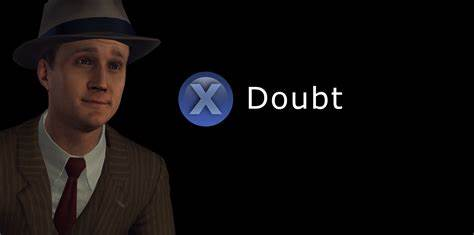

DONE:: So, are we good now?

No, we have certain leaf nodes with (feature, value) as (None, None). This happens because `if(len(ys) == 0):` turns out to be true during the ``TDI00`` and ``TDI01``. Logically, our algorithm is correct. There is no samples in this leaf node, therefore this leaf node should represent no value.

Practically this is not good. Imagine a sample [4.0, 1.8, 3.5, 1.7], what does your tree classify it into.

Run the following two blocks, the first one should fail. The second one is OK. Explain why.

The first block fails because in tree00 there is no majority vote classification when there are no predicates left. While in tree01 there is.

In [54]:
print(predict(tree00, [4.0, 1.8, 3.5, 1.7]))

AttributeError: ignored

In [55]:
print(predict(tree01, [4.0, 1.8, 3.5, 1.7]))

1


DONE:: explain why the first block above fail, but the second classifies fine.

The first block fails because in tree00 there is no majority vote classification when there are no predicates left. While in tree01 there is. This results in a node being returned where the feature is None and thus the error is produced when trying to assign feature.

Then run the code below, what you get?

If you didn't apply weight, you should get NONE, if you did apply weight, you might get something else.

In [56]:
print(predict(tree01, [5.0, 3.6, 2.2, 1.5]))

None


###TDI02

AI or ML model should generalize from existing samples and should work with potential new samples. From the last experiment, we know our model does not generalize well yet because of the existence of (None,None) node.

DONE:: Modify your ``TDI01`` algorithm into ``TDI02``, so that:

1. It is as accurate as it was before with the training samples.

2. It can also now make a sensible prediction about new samples such as [4.0, 1.8, 3.5, 1.7]

In [57]:
def TDI02(Xs, ys, predicates):
    ## step 1 and 2, I do half of it for you.
    ##DONE you need to implement sameClass() below to make it work.
    #print(ys)
    if(len(ys) == 0):
        print("THIS SHOULD NEVER HAPPEN NOW", Xs)
        return Node(None,None,None,None)
    if (sameClass(ys)):
        return Node(None, ys[0], None, None)
    ##DONE..
    if (len(predicates)==0):
        print("MAJORITY: " + str(majorityVote(ys)))
        return Node(None,majorityVote(ys),None,None)
    ## step 4
    feature, value = ChooseMinErrorPred(Xs, ys, predicates)
    ## step 5
    print("branching feature and its value")
    print(feature, value)
    predicate_index = predicates.index(feature)
    restPredicates = predicates[:predicate_index] + predicates[predicate_index+1:]
    #print(restPredicates)
    ## step 6
    leftXs, rightXs, leftys, rightys = splits(Xs, ys, feature, value)
    print("Left: ")
    print(leftXs, leftys)
    print("Right: ")
    print(rightXs, rightys)
    #DONE what should this function return
    if (len(leftys) == 0 or len(rightys) == 0):
      return Node(None,majorityVote(ys),None,None)
    else:
      return Node(feature,value,TDI02(leftXs,leftys,restPredicates),TDI02(rightXs,rightys,restPredicates))


In [58]:
predicates = list(range(len(Xs[0])))
tree02 = TDI02(Xs, ys, predicates)

branching feature and its value
2 1.9
Left: 
[array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3. , 1.4, 0.1]), array([4.3, 3. , 1.1, 0.1]), array([5.8, 4. , 1.2, 0.2]), array([5.7, 4.4, 1.5, 0.4]), array([5.4, 3.9, 1.3, 0.4]), array([5.1, 3.5, 1.4, 0.3]), array([5.7, 3.8, 1.7, 0.3]), array([5.1, 3.8, 1.5, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([4.6, 3.6, 1. , 0.2]), array([5.1, 3.3, 1.7, 0.5]), array([4.8, 3.4, 1.9, 0.2]), array([5. , 3. , 1.6, 0.2]), array([5. , 3.4, 1.6, 0.4]), array([5.2, 3.5, 1.5, 0.2]), array([5.2, 3.4, 1.4, 0.2]), array([4.7, 3.2, 1.6, 0.2]), array([4.8, 3.1, 1.6, 0.2]), array([5.4, 3.4, 1.5, 0.4]), array([5.2, 4.1, 1.5, 0.1]

In [59]:
showTree(tree02)

<__main__.Node object at 0x7a1779eabfa0> <__main__.Node object at 0x7a17b3567040> <__main__.Node object at 0x7a1779eabc10>
2 1.9
<__main__.Node object at 0x7a17b3567040> None None
None 0
<__main__.Node object at 0x7a1779eabc10> <__main__.Node object at 0x7a1779eabd90> <__main__.Node object at 0x7a1779ea8310>
3 1.7
<__main__.Node object at 0x7a1779eabd90> <__main__.Node object at 0x7a1779eabdf0> <__main__.Node object at 0x7a1779eabf70>
0 7.0
<__main__.Node object at 0x7a1779eabdf0> None None
None 1
<__main__.Node object at 0x7a1779eabf70> None None
None 2
<__main__.Node object at 0x7a1779ea8310> None None
None 2


Do you notice any (None,None) node?

If you did everything properly, your ``tree02`` should be a lot more concise than ``tree01``, but still have a similar structure in terms of branching.

It should also have the same accuracy on training samples ``Xs``

In [60]:
predYs = predictOnXs(tree02, Xs)
accuracy_score(ys, predYs)

0.9666666666666667

Moreover, it should now work with the novel example

DONE:: The following should output a value that's not `None`, unlike `tree00` and `tree01`

In [61]:
print(predict(tree02, [4.0, 1.8, 3.5, 1.7]))

1


In [62]:
print(predict(tree02, [5.0, 3.6, 2.2, 1.5]))

1


DONE:: Summarize what is the difference between ``TDI00()``, ``TDI01()``, and `TDI02()`. Alternatively, you can talk about what's the difference in their result trees.

In TDI00() there is no majority vote feature at a leaf node where all of the y labels are not the same class. In TDI01(), there is a mjority vote feature; however, there is no check after the splits are made for a split that has no incidents. Because there is no check, when the function recurses it hits the len(y) check and returns a Node with None for all parameters. In TDI02(), a check for an empty split is made and if there is an empty split it returns a leaf node with a majority vote using the current y labels.

DONE:: give yourself a pat on the back.

###TDI11

oh, we forgot about this.

''2. When we branch out our decision tree, we are left with less and less predicates to work with. What if that's not true? What if we are still working with the same set of predicates? For example, we used predicate#1, but we now allow ourselves to use it again on a later branch. ''

build another algorithm `TDI11()` to do this. The strange name is to differentiate from our other algorithms. You can modify `TDI02()` for this

DONE :: build `TDI11()`.

Add the line `print("majority vote happens")` right before the line where you use majority vote as the value of a node. Because you will never need to take a majority vote as you never run out of predicates. This is a way to debug if something happens or not

In [63]:
def TDI11(Xs, ys, predicates):
    ##DONE..
    ## step 1 and 2, I do half of it for you.
    ##DONE you need to implement sameClass() below to make it work.
    # print(ys)
    if(len(ys) == 0):
        # print("check", Xs)
        return Node(None,None,None,None)

    if (sameClass(ys)):
        return Node(None, ys[0], None, None)

    ##DONE
    feature, value = ChooseMinErrorPred(Xs, ys, predicates)
    print("branching feature and its value")
    print(feature, value)


    leftXs, rightXs, leftys, rightys = splits(Xs, ys, feature, value)
    print("Left: ")
    print(leftXs, leftys)
    print("Right: ")
    print(rightXs, rightys)

    if (len(leftXs) == 0):
      print("leftXs empty")
      return TDI11(rightXs,rightys,predicates)

    if (len(rightXs) == 0):
      print("rightXs empty")
      return TDI11(leftXs,leftys,predicates)

    #Added for debugging purposes
    if (len(leftXs) == 0) and (len(rightXs) == 0):
      print("Both Xs empty")
      return Node(None,None,None,None)


    if (len(leftys) == 0 or len(rightys) == 0):
      print("majority vote happens")
      return Node(None,majorityVote(ys),None,None)

    else:
      return Node(feature,value,TDI11(leftXs,leftys,predicates),TDI11(rightXs,rightys,predicates))


Test run your new algorithm to get a new tree

In [64]:
predicates = list(range(len(Xs[0])))
tree11 = TDI11(Xs, ys, predicates)

Streaming output truncated to the last 5000 lines.
0 7.0
Left: 
[array([7. , 3.2, 4.7, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6.9, 3.1, 4.9, 1.5]), array([5.5, 2.3, 4. , 1.3]), array([6.5, 2.8, 4.6, 1.5]), array([5.7, 2.8, 4.5, 1.3]), array([6.3, 3.3, 4.7, 1.6]), array([4.9, 2.4, 3.3, 1. ]), array([6.6, 2.9, 4.6, 1.3]), array([5.2, 2.7, 3.9, 1.4]), array([5. , 2. , 3.5, 1. ]), array([5.9, 3. , 4.2, 1.5]), array([6. , 2.2, 4. , 1. ]), array([6.1, 2.9, 4.7, 1.4]), array([5.6, 2.9, 3.6, 1.3]), array([6.7, 3.1, 4.4, 1.4]), array([5.6, 3. , 4.5, 1.5]), array([5.8, 2.7, 4.1, 1. ]), array([6.2, 2.2, 4.5, 1.5]), array([5.6, 2.5, 3.9, 1.1]), array([6.1, 2.8, 4. , 1.3]), array([6.3, 2.5, 4.9, 1.5]), array([6.1, 2.8, 4.7, 1.2]), array([6.4, 2.9, 4.3, 1.3]), array([6.6, 3. , 4.4, 1.4]), array([6.8, 2.8, 4.8, 1.4]), array([6.7, 3. , 5. , 1.7]), array([6. , 2.9, 4.5, 1.5]), array([5.7, 2.6, 3.5, 1. ]), array([5.5, 2.4, 3.8, 1.1]), array([5.5, 2.4, 3.7, 1. ]), array([5.8, 2.7, 3.9, 1.2]), array([

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-64-8077e6e01c82>", line 2, in <cell line: 2>
    tree11 = TDI11(Xs, ys, predicates)
  File "<ipython-input-63-f5000729691f>", line 44, in TDI11
    return Node(feature,value,TDI11(leftXs,leftys,predicates),TDI11(rightXs,rightys,predicates))
  File "<ipython-input-63-f5000729691f>", line 44, in TDI11
    return Node(feature,value,TDI11(leftXs,leftys,predicates),TDI11(rightXs,rightys,predicates))
  File "<ipython-input-63-f5000729691f>", line 44, in TDI11
    return Node(feature,value,TDI11(leftXs,leftys,predicates),TDI11(rightXs,rightys,predicates))
  File "<ipython-input-63-f5000729691f>", line 31, in TDI11
    return TDI11(leftXs,leftys,predicates)
  File "<ipython-input-63-f5000729691f>", line 31, in TDI11
    return TDI11(leftXs,leftys,predicates)
  File "<ipython-inpu

TypeError: ignored

If you did things right here. Your code above to build ``tree11`` will run forever.

HARD DONE:: Why does that happen? In my output, there is a branch that is repeatedly made. The leftXs and leftys are split exactly the same and the rightXs is empty. The splits are also made using the same feature and value.

I believe it runs forever because we keep resuing the same feature and value to make a decision. The logic of using the same decision criteria everytime shows that the agent is not learning how to make a better decision from previous decisions. Furthermore, by using the same decision criteria the decision tree will never be able to classify the samples that are being misclassified unless it uses new decision criteria to correctly classify them.

This require medium-high debugging skill. You may need to run the function again with prints here and there, but don't run the `TDI11()` too many times as it will deplete your quota. See hint below as well

If you did apply weight, you might get something else. Your tree might actually be built without a problem

You may use the code below to help you think about the question above.

This is examining the result ``tree02`` from ``TDI02``

In [65]:
predYs = predictOnXs(tree02, Xs)
accuracy_score(ys, predYs)

0.9666666666666667

In [66]:
index = [ys != predYs]

In [67]:
index[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [68]:
##output which of index is true
for i in range(len(index[0])):
    if(index[0][i]):
        print(i)

70
106
119
133
134


In my case, I outputed 70 as one of the indices of the samples, that the decision tree misclassified.

In [69]:
Xs[70]

array([5.9, 3.2, 4.8, 1.8])

In [70]:
ys[70]

1

In [71]:
print(predict(tree02, Xs[70]))

2


##Extra Credit (2): "Perfection" decision tree

DONE:: Create your own version of Node, Tree, and algorithms, that can produce a tree, that have 100% accuracy on the iris data set.

Prove your tree's 100% accuracy by test runs on the data set.

In [72]:
def ChooseMinErrorPred_SP(Xs, ys, predicates):
    # DONE
    dataCount = len(Xs)
    if (dataCount == 0):
        return None, None
    minError = np.inf
    bestFeature = 0
    bestValue = Xs[0][0]

    #Loop for each feature and value to find the best match to reduce the error
    for feature in predicates:
        valueList = [X[feature] for X in Xs]
        valueSet = set(valueList)
        for value in valueSet:
            ##DONE split using feature and value pair
            ## calculate the entropy using the function below
            leftXs, rightXs, leftys, rightys = splits(Xs, ys, feature, value)

            entropyOfLeft = entropyOfaBranch(leftys)
            entropyOfRight = entropyOfaBranch(rightys)
            totalEntropy = entropyOfLeft + entropyOfRight

            # Added weights to the entropy calculation
            weightOfLeft = len(leftys)/len(ys)
            weightOfRight = len(rightys)/len(ys)

            weightedLeftEntropy = weightOfLeft * entropyOfLeft
            weightedRightEntropy = weightOfRight * entropyOfRight

            totalWeightedEntropy = weightedLeftEntropy + weightedRightEntropy

            # FOR DEBUGGING
            #print(feature,value,totalEntropy)

            if totalWeightedEntropy < minError:
                minError = totalWeightedEntropy
                bestFeature = feature
                bestValue = value

    return bestFeature, bestValue

In [73]:
def TDI11_SP(Xs, ys, predicates):
    ##DONE
    if(len(ys) == 0):
        # print("check", Xs)
        return Node(None,None,None,None)

    if (sameClass(ys)):
        return Node(None, ys[0], None, None)

    ##DONE
    feature, value = ChooseMinErrorPred_SP(Xs, ys, predicates)
    print("branching feature and its value")
    print(feature, value)


    leftXs, rightXs, leftys, rightys = splits(Xs, ys, feature, value)
    print("Left: ")
    print(leftXs, leftys)
    print("Right: ")
    print(rightXs, rightys)


    if (len(leftXs) == 0):
      print("leftXs empty")
      return TDI11_SP(rightXs,rightys,predicates)

    if (len(rightXs) == 0):
      print("rightXs empty")
      return TDI11_SP(leftXs,leftys,predicates)

    else:
      return Node(feature,value,TDI11_SP(leftXs,leftys,predicates),TDI11_SP(rightXs,rightys,predicates))



In [74]:
predicates = list(range(len(Xs[0])))
tree11_sp = TDI11_SP(Xs, ys, predicates)

branching feature and its value
2 1.9
Left: 
[array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3. , 1.4, 0.1]), array([4.3, 3. , 1.1, 0.1]), array([5.8, 4. , 1.2, 0.2]), array([5.7, 4.4, 1.5, 0.4]), array([5.4, 3.9, 1.3, 0.4]), array([5.1, 3.5, 1.4, 0.3]), array([5.7, 3.8, 1.7, 0.3]), array([5.1, 3.8, 1.5, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([4.6, 3.6, 1. , 0.2]), array([5.1, 3.3, 1.7, 0.5]), array([4.8, 3.4, 1.9, 0.2]), array([5. , 3. , 1.6, 0.2]), array([5. , 3.4, 1.6, 0.4]), array([5.2, 3.5, 1.5, 0.2]), array([5.2, 3.4, 1.4, 0.2]), array([4.7, 3.2, 1.6, 0.2]), array([4.8, 3.1, 1.6, 0.2]), array([5.4, 3.4, 1.5, 0.4]), array([5.2, 4.1, 1.5, 0.1]

In [75]:
showTree(tree11_sp)


<__main__.Node object at 0x7a1779b53bb0> <__main__.Node object at 0x7a1779beb310> <__main__.Node object at 0x7a1779b512a0>
2 1.9
<__main__.Node object at 0x7a1779beb310> None None
None 0
<__main__.Node object at 0x7a1779b512a0> <__main__.Node object at 0x7a1779b50280> <__main__.Node object at 0x7a1779b50eb0>
3 1.7
<__main__.Node object at 0x7a1779b50280> <__main__.Node object at 0x7a1779b525f0> <__main__.Node object at 0x7a1779b52a40>
2 4.9
<__main__.Node object at 0x7a1779b525f0> <__main__.Node object at 0x7a1779b531f0> <__main__.Node object at 0x7a1779b52710>
3 1.6
<__main__.Node object at 0x7a1779b531f0> None None
None 1
<__main__.Node object at 0x7a1779b52710> None None
None 2
<__main__.Node object at 0x7a1779b52a40> <__main__.Node object at 0x7a1779bebd00> <__main__.Node object at 0x7a1779b52c80>
3 1.5
<__main__.Node object at 0x7a1779bebd00> None None
None 2
<__main__.Node object at 0x7a1779b52c80> <__main__.Node object at 0x7a1779b52800> <__main__.Node object at 0x7a1779b53010>


DONE:: if your tree is perfect, you should get 100% accuracy below.

In [76]:
predYs = predictOnXs(tree11_sp, Xs)
accuracy_score(ys, predYs)

1.0

#Decision Tree off-the-shelf

The popular AI algorithms are already implemented multiple times by multiple people. Some of the most popular algorithms have standard implementation done in major AI libraries. We chose python for our teaching language for this course, because python has the biggest environment for AI libraries. Almost all methods, algorithms, AI/ML stuff you learn on a textbook, can be found in some off-the-shelf over-the-counter ready-to-use library in python.

Let's use the decision tree in sklearn. Following code is adapted from:

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html

<ipython-input-77-0cb0357a7c3a>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-77-0cb0357a7c3a>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-77-0cb0357a7c3a>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-77-0cb0357a7c3a>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-77-0cb0357a7c3a>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-77-0cb0357a7c3a>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


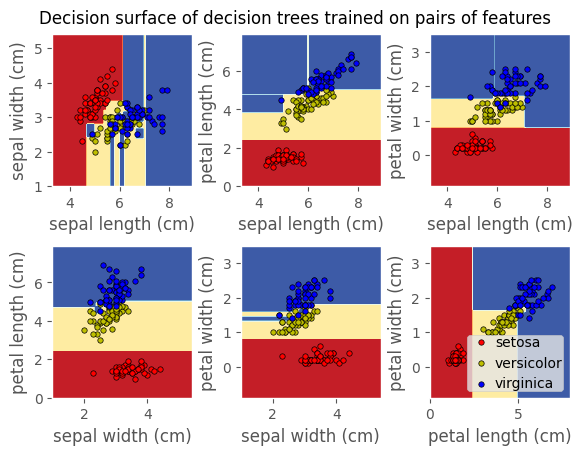

In [77]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

The above output shows 6 figures, each showing the data distribution based on two features, and their class labels. The figure also draws decision boundary about how the decision tree is making decisions.

DONE:: study about decision boundary yourself, then answer the following question:
According to the 6 figures, which ones of the features are useful for classifying? which ones are bad for classifying? Explain why

The first, second, and fifth figures are bad for classifying because they are very sensitive to extreme classsifying examples. In those figures there are decision surfaces that are made from  few points

In the third, fourth, and sixth figures, the decision surfaces are smooth and clearly defined. The desicions are less sensitive to extreme examples and are likely to make more accurate decision on test data as a result.



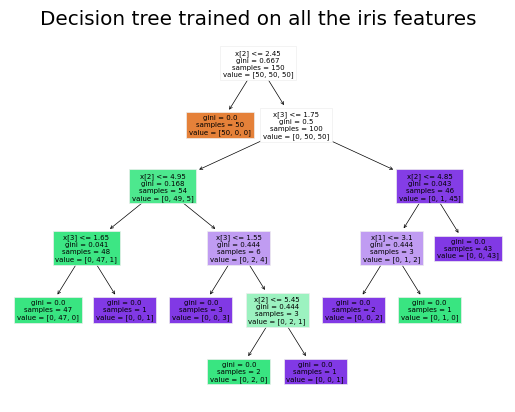

In [78]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

According to the linked webpage, scikit-learn (sklearn) uses an optimized version of the CART algorithm, which is a successor for C4.5, which in turn is a successor for ID3. We are doing some kind of ID3 in our own code. The difference in the result tree is natural since there are so many design decisions involved.

This is an example that, even if you allegedly use the same algorithm, you may ended up with different result. Machine learning ultimately carries some bias or preassumption from the researchers' decision, whatever we start with will influence whatever we get in return.

In [79]:
output = clf.predict(iris.data)


In [80]:
len(ys)

150

In [81]:
accuracy_score(ys, output)

1.0

#Not optional: Use decision tree on your own data set

I repeat, NOT OPTIONAL.

DONE:: Find some data set online. Example: https://archive.ics.uci.edu/

TODO::Extra credit (1), use a data set from your daily life, Berry related, your other classes.

DONE:: Extra credit (1) Your data might involve some pre-processing. Write in code or text cells clearly that, if you don't do pre-processing, what kind of issue you are encountering. and how you pre-processed your data to solve the issue.

In [82]:
!pip3 install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)

# pre-processing, usedChatGPT to find methods to replace missing values.
# I chose linear interpolation as the method to replace missing values
heart_disease.data.features.interpolate(method='linear', inplace=True)
heart_disease.data.targets.interpolate(method='linear', inplace=True)


X = heart_disease.data.features.values
y = heart_disease.data.targets.values

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K

<ipython-input-82-683c1f928234>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease.data.features.interpolate(method='linear', inplace=True)
<ipython-input-82-683c1f928234>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease.data.targets.interpolate(method='linear', inplace=True)


In [83]:
heart_disease.data.features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [84]:
# changing y to be a list of values instead of an array of arrays
yvalues = []
for i in y:
  yvalues.append(i[0])
print(yvalues)


[0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0, 1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3, 1, 1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4, 3, 1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1, 0, 1, 0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 1, 2, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 4, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 3, 1, 1, 2, 3, 1, 0]


In [85]:
predicates = list(range(len(X[0])))
tree_mydata = TDI02(X, yvalues, predicates)

branching feature and its value
9 4.2
Left: 
[array([ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
         2.3,   3. ,   0. ,   6. ]), array([ 67. ,   1. ,   4. , 160. , 286. ,   0. ,   2. , 108. ,   1. ,
         1.5,   2. ,   3. ,   3. ]), array([ 67. ,   1. ,   4. , 120. , 229. ,   0. ,   2. , 129. ,   1. ,
         2.6,   2. ,   2. ,   7. ]), array([ 37. ,   1. ,   3. , 130. , 250. ,   0. ,   0. , 187. ,   0. ,
         3.5,   3. ,   0. ,   3. ]), array([ 41. ,   0. ,   2. , 130. , 204. ,   0. ,   2. , 172. ,   0. ,
         1.4,   1. ,   0. ,   3. ]), array([ 56. ,   1. ,   2. , 120. , 236. ,   0. ,   0. , 178. ,   0. ,
         0.8,   1. ,   0. ,   3. ]), array([ 62. ,   0. ,   4. , 140. , 268. ,   0. ,   2. , 160. ,   0. ,
         3.6,   3. ,   2. ,   3. ]), array([ 57. ,   0. ,   4. , 120. , 354. ,   0. ,   0. , 163. ,   1. ,
         0.6,   1. ,   0. ,   3. ]), array([ 63. ,   1. ,   4. , 130. , 254. ,   0. ,   2. , 147. ,   0. ,
         1.4,   2. ,   1. , 

In [86]:
showTree(tree_mydata)

<__main__.Node object at 0x7a1778187be0> <__main__.Node object at 0x7a1778187820> <__main__.Node object at 0x7a1778187b80>
9 4.2
<__main__.Node object at 0x7a1778187820> <__main__.Node object at 0x7a17781878b0> <__main__.Node object at 0x7a17781872b0>
0 76.0
<__main__.Node object at 0x7a17781878b0> <__main__.Node object at 0x7a1778186f20> <__main__.Node object at 0x7a1778187910>
3 192.0
<__main__.Node object at 0x7a1778186f20> <__main__.Node object at 0x7a177713b8e0> <__main__.Node object at 0x7a1778187850>
7 71.0
<__main__.Node object at 0x7a177713b8e0> None None
None 2
<__main__.Node object at 0x7a1778187850> None None
None 0
<__main__.Node object at 0x7a1778187910> None None
None 3
<__main__.Node object at 0x7a17781872b0> None None
None 4
<__main__.Node object at 0x7a1778187b80> <__main__.Node object at 0x7a1778187af0> <__main__.Node object at 0x7a1778187b50>
0 58.0
<__main__.Node object at 0x7a1778187af0> None None
None 2
<__main__.Node object at 0x7a1778187b50> None None
None 3


In [87]:
predYs = predictOnXs(tree_mydata, X)
accuracy_score(y, predYs)

0.5544554455445545

DONE:: Follow examples from above, choose one tree algorithm that we built (not the off-the-shelf one) to build a tree to solve the new data set. Output the accuracy score of your tree on that data.

There are two possible outcomes：

1. Your tree does a fine job and the accuracy is high.

2. Your tree does a poor job and the accuracy is low

Either way, explain why your tree model does good or bad.



your data set may includes some kind of nominal attributes. If it does, you will need to modify our algorithm to handle the nominal features so that the decision tree can learn about it. Currently, our own trees above and the corresponding TDI algorithms handle numerical values.

Without pre-processing, although the data is numeric data, there is missing data in the dataset. And as it stands the decision tree does not know how to handle missing data. It then splts on the value 'nan'.

After pre-processing, the decision tree is able to make a tree with multiple branches. Surprisingly, the accuracy is only ~0.01% better.

One reason the accuracy could be low is because there are no great branching features and values that make good splits. Another reason could be in TDI02 we do not reuse predicates and weight the entropies of each branch. This would give the decision tree a limited amount of decisions it could make and the entropy calculations would not prioritize underepresented instances/examples in the dataset. Instead a majority vote is taken on the split once the predicates are empty which can lead to many misclassified examples if the splits are not good.

#Extra Credit (2): Decision About A connect4 game

## Create the data set

So watching two AI players playing, you begin to contemplate and calculate. You know this game well, you know AI well. Assuming the casino is not cheating (swapping their AIs or manipulating the AI's decisions after humans make a bet).
You got this, you tell yourself, you are going to walk out of this place a millionaire!!

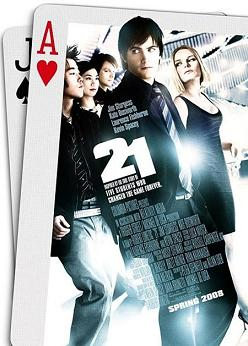

IMPORTANT:: To make things easier, let's assume that the two AIs are pretty dumb AIs. They are both AI00 from before. We might switch up things later.

The stage is set, now you need to abstract the game into a way so you can analyse it. You decide to observe first, gather data, and then make a perfect algorithm in your mind that can predict game outcome given any snapshot of the game.

Allow me to repeat the rule:

you are allowed to take a glance at the game board when the game is ongoing, but just one glance, a random one too. You have the information of all the pieces on the board. And then you are going to bet on, who is going to win the game.






TODO::

Before you continue, think about what kind of data structure you will use to represent the experience you are able to "observe". Write your answer down. (wrong answer not punished)

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

We want to create a data set of X-s and y-s. Each $X$ will be one snapshot of the game board. Or a state. Each $y$ will be the winner of the game when it ended.

TODO::

How many values are possibel for a $y$?

What does one $X$ look like? Or, what is one $X$?

OK, so I made this special GM for Casino.

It takes two players to initialize, and it outputs a snapshot and a game outcome everytime play is called.

In [88]:
#This should make sense now.
class CasinoGM:
    def __init__(self, player1, player2):
        self.player1 = player1
        self.player2 = player2
        self.board = State(create_board())
        self.history = []

        self.ongoing = True
        self.turn = 1 #turn number
        self.current_player = player1.player_symbol

    def play(self):
        while self.ongoing:
            play_print("Turn # "+ str(self.turn))
            self.turn += 1

            self.history.append(self.board)

            if self.current_player == self.player1.player_symbol:
                self.board = self.player1.make_move(self.board)
            else:
                self.board = self.player2.make_move(self.board)
            play_print(self.board)
            if self.board.winning(self.current_player) != False:
                play_print("Player " + str(self.current_player) +"Won!")
                self.ongoing = False
                #randomly return one item in history
                return self.random_snapshot(), self.current_player
            if self.current_player == self.player1.player_symbol:
                self.current_player = self.player2.player_symbol
            else:
                self.current_player = self.player1.player_symbol

            if self.board.no_valid_location():
                play_print("Draw!")
                self.ongoing = False
                return self.random_snapshot(), 0

    def random_snapshot(self):
        return self.history[random.randint(0, len(self.history)-1)]


Let's first create a data set of 100 battles. Assuming the players are both AI0.

In [89]:
Xs = []
ys = []

count = 100
player1 = AI00(1)
player2 = AI00(2)

for i in range(count):
    X, y = CasinoGM(player1,player2).play()
    Xs.append(X)
    ys.append(y)



TODO::
Examine your data set. Do they look like things you expected?

If yes, explain with a few examples.

If not, why? Also explain with some examples.

Now the data is ready, let's build your model to process the data. Unfortunately, you drop out of college because you believed you can go to casino and make money and be happy. Fortunately, during the last class you took you learned about decision tree.

Let's build a decision tree for this.

In [90]:
type(Xs[0])

__main__.State

In [91]:
Xs[0].board[0]

array([1., 1., 2., 0., 0., 1., 2.])

HARD TODO:: but wait, the Xs is an array storing game states, each state contains a 2-d arrays representing a game board snapshot. They are not like any of the samples we have seen! Your job is to `preprocess` the data in a way such that Xs becomes a format that the decision tree can learn from. This can mean anything, use your imagination, what features would you like to extract? Start with the function below might help you think.

In [92]:
##TODO
##input: a state which contains a board in 2-d array format
##output: a single array of features, ready to be learned by decision tree algorithm
def preprocess(board):
    ##TODO...

SyntaxError: ignored

TODO::

Build your decision tree to predict game outcome given a board snapshot.

TODO::

When I build my data set, my $ys$ are about 50-50 division.
About 50 percent chance player 1 wins, and about 50 percent chance player 2 wins. So the game is almost random outcome.

However, my decision tree is able to predict winning or losing, better than a 50-50 guess. Its accuracy is actually not too shabby.

Why? Why is there this misalignment between the data set, and the model?

Or is this really an misalignment?

#Evaluating an algorithm/ a model

Rerun the below, it will overwrite the global variable `Xs` and `ys`. This is important in case if you are working on the connect 4 problem before, which also overwrites `Xs` and `ys`.

In [93]:
iris = load_iris()
Xs = iris['data']
ys = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

Now we have bunch of tree algorithms, each can produce a possible tree given a training data. We want to know, in the current context (e.g. given the training data), which AI algorithm is better and which model is better.

Careful here, we are not just seeking the best model, we are seeking the best AI algorithm, because the AI algorithm will produce a model for a training data set.

Imagine, you can choose have a single good model that can work well with the iris data set, or you can choose to have an algorithm that can produce a good model given any data set, which one would you choose?

Now in real-world industry, these two are often mixed-up and the boundary is blurry. If a person talks about a model being good for a task domain, they are often really saying that "the model is a good model to start with, and if trained properly with some kind of algorithm which comes with the model, the model will generalize well on the training data and predict well on future data".

Let's say we want to compare the `TDI02` and `TDI11` algorithm we had above. Before we can compare them, we need to know, a way to evaluate an algorithm. The most straightforward way to evaluate an algorithm, is to use the algorithm, on a training data set, to produce a model, and then we evaluate the model. The performance of the model represents the performance of the algorithm.

We can evaluate a model by running the model on some input and see if the output matches with the expected output (or true label)

We have already been doing this multiple times, but let's now finally wrap it in a function for convenience.

In [94]:
def treeScore(tree, Xs, ys):
    predYs = predictOnXs(tree, Xs)
    # print(predYs)
    return accuracy_score(ys, predYs)

In [95]:
def algorithmScore(algorithm, Xs, ys):
    predicates = list(range(len(Xs[0])))
    theTree = algorithm(Xs, ys, predicates)
    return treeScore(theTree, Xs, ys)

In [96]:
algorithmScore(TDI01, Xs, ys)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
branching feature and its value
2 1.9
Left: 
[array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3. , 1.4, 0.1]), array([4.3, 3. , 1.1, 0.1]), array([5.8, 4. , 1.2, 0.2]), array([5.7, 4.4, 1.5, 0.4]), array([5.4, 3.9, 1.3, 0.4]), array([5.1, 3.5, 1.4, 0.3]), array([5.7, 3.8, 1.7, 0.3]), array([5.1, 3.8, 1.5, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([4.6

0.9666666666666667

In [97]:
algorithmScore(TDI02, Xs, ys)

branching feature and its value
2 1.9
Left: 
[array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3. , 1.4, 0.1]), array([4.3, 3. , 1.1, 0.1]), array([5.8, 4. , 1.2, 0.2]), array([5.7, 4.4, 1.5, 0.4]), array([5.4, 3.9, 1.3, 0.4]), array([5.1, 3.5, 1.4, 0.3]), array([5.7, 3.8, 1.7, 0.3]), array([5.1, 3.8, 1.5, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([4.6, 3.6, 1. , 0.2]), array([5.1, 3.3, 1.7, 0.5]), array([4.8, 3.4, 1.9, 0.2]), array([5. , 3. , 1.6, 0.2]), array([5. , 3.4, 1.6, 0.4]), array([5.2, 3.5, 1.5, 0.2]), array([5.2, 3.4, 1.4, 0.2]), array([4.7, 3.2, 1.6, 0.2]), array([4.8, 3.1, 1.6, 0.2]), array([5.4, 3.4, 1.5, 0.4]), array([5.2, 4.1, 1.5, 0.1]

0.9666666666666667

We don't really want to train the algorithm on a data set and then evaluate them on the same data set.

DONE:: explain why. You don't want to do this because the algorithm has already trained and seen the data it has trained on. The algorithm then would perform well because it has already seen that data. Evaluating an algorithm on data it has already seen is not helpful in understanding it's ability to perform. Like an athlete who can do the same drill in practice very well, but is unable to perform the action in a game. The same could be said for an algorithm, it is great in practice, but how does it perform on data it has never seen.

DONE::

If you have done the extra credit part `"Perfection" decision tree`, and let's say you end up with a very ugly looking, overthinking, non-intuitive tree. What would be the accuracy score if you train and test with the same data on that perfect tree?

Explain why. On that tree, the accuracy score would be 1.0 becuse it has trained itself to perfectly classify all the examples in the training set. Therefore, if you test that algorithm on the training set it would achieve a score of 1.0

In [98]:
algorithmScore(TDI11_SP, Xs, ys)

branching feature and its value
2 1.9
Left: 
[array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3. , 1.4, 0.1]), array([4.3, 3. , 1.1, 0.1]), array([5.8, 4. , 1.2, 0.2]), array([5.7, 4.4, 1.5, 0.4]), array([5.4, 3.9, 1.3, 0.4]), array([5.1, 3.5, 1.4, 0.3]), array([5.7, 3.8, 1.7, 0.3]), array([5.1, 3.8, 1.5, 0.3]), array([5.4, 3.4, 1.7, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([4.6, 3.6, 1. , 0.2]), array([5.1, 3.3, 1.7, 0.5]), array([4.8, 3.4, 1.9, 0.2]), array([5. , 3. , 1.6, 0.2]), array([5. , 3.4, 1.6, 0.4]), array([5.2, 3.5, 1.5, 0.2]), array([5.2, 3.4, 1.4, 0.2]), array([4.7, 3.2, 1.6, 0.2]), array([4.8, 3.1, 1.6, 0.2]), array([5.4, 3.4, 1.5, 0.4]), array([5.2, 4.1, 1.5, 0.1]

1.0

So this reminds me of a typical Chinese student, who masters the art of exam taking, can get perfect scores on exams, but don't really do well in real-life application of the knowledge. I am speaking of none other but myself, at least my old self.

But we all change. Looking back, I would say, the past E did a fairly good job, he played his poker of life well given the cards he had. Now it's onto the current E to do what the past E didn't have a chance to do. I waive goodbye to perfectionism, because I now know what's better than perfect.

OK, we were side-tracked.

So training and testing on the same data set doesn't make sense. Ideally, you train on some data set, and test on some other data set. The training set and the testing set should not have overlap. Because if there are any overlap, then rote memorization can just memorize the answer during training, and recite the answer during testing. And rote memorization is not understanding or generalizing, we do not want rote memorization.

DONE:: write a function that can split a data set of Xs and ys into a training set and a testing set. Each set has its own Xs and ys.

In [99]:
import random
## This is harder than you think
## Bug hint: Are you using deep copy?
## Bug hint 2: if you shuffle, are you shuffling X and y together or separately
def train_test_split_ratio(Xs, ys, ratio=0.25):
    """
    Splits a data set of Xs and ys into a training set and a testing set.
    Each set has its own Xs and ys. If ratio is 0.25, then 25% of all cases are testing,
    the rest is for training.

    Args:
        Xs: A list of arrays.
        ys: A list of labels.
        ratio: The ratio of the training set to the testing set.

    Returns:
        A tuple of two tuples. The first tuple contains the training set's Xs and ys.
        The second tuple contains the testing set's Xs and ys.
    """
    #DONE

    # Combines the x and y values so they can be shuffled together
    xValues = copy.deepcopy(Xs)
    yValues = copy.deepcopy(ys)

    data = []
    i = 0
    for i in range(len(xValues)):
      pair = [xValues[i],yValues[i]]
      data.append(pair)



    random.shuffle(data)

    split = int(len(data) * ratio) # complains that index is not an integer so change the type from
                                   # float to integer

    training = data[split:] # gives all the data before the split
    test = data[:split] # gives all the data after the split

    # Making sure the correct split is assigned to the correct set
    #print(len(training))
    #print(len(test))

    train_Xs = []
    train_ys = []
    test_Xs = []
    test_ys = []


    for d in training:
      train_Xs.append(d[0])
      train_ys.append(d[1])

    for d in test:
      test_Xs.append(d[0])
      test_ys.append(d[1])






    return train_Xs, train_ys, test_Xs, test_ys

In [100]:
train_test_split_ratio(Xs, ys, ratio=0.25)

([array([5.9, 3. , 4.2, 1.5]),
  array([5.6, 3. , 4.5, 1.5]),
  array([5.1, 3.5, 1.4, 0.3]),
  array([6.9, 3.2, 5.7, 2.3]),
  array([4.8, 3.4, 1.6, 0.2]),
  array([5.8, 2.7, 4.1, 1. ]),
  array([7.1, 3. , 5.9, 2.1]),
  array([6.3, 2.7, 4.9, 1.8]),
  array([5. , 3.5, 1.6, 0.6]),
  array([6. , 2.2, 4. , 1. ]),
  array([6.2, 2.8, 4.8, 1.8]),
  array([5.8, 2.8, 5.1, 2.4]),
  array([4.3, 3. , 1.1, 0.1]),
  array([6.3, 2.3, 4.4, 1.3]),
  array([5.4, 3. , 4.5, 1.5]),
  array([5.5, 3.5, 1.3, 0.2]),
  array([6.8, 3. , 5.5, 2.1]),
  array([6.6, 2.9, 4.6, 1.3]),
  array([5.5, 2.4, 3.7, 1. ]),
  array([6.7, 3.1, 4.4, 1.4]),
  array([4.6, 3.2, 1.4, 0.2]),
  array([6. , 3.4, 4.5, 1.6]),
  array([5. , 3.2, 1.2, 0.2]),
  array([6.7, 3. , 5.2, 2.3]),
  array([6.4, 2.8, 5.6, 2.2]),
  array([5.2, 2.7, 3.9, 1.4]),
  array([7.9, 3.8, 6.4, 2. ]),
  array([6.1, 2.8, 4.7, 1.2]),
  array([5.1, 3.8, 1.9, 0.4]),
  array([6.2, 2.2, 4.5, 1.5]),
  array([4.6, 3.4, 1.4, 0.3]),
  array([6.7, 2.5, 5.8, 1.8]),
  array(

DONE:: write the following function, that will build a tree by training with a training data set, and then evaluate the tree built using the testing data set.

In [101]:
def algorithmScoreTrainTest(algorithm, train_Xs, train_ys, test_Xs, test_ys ):
    '''
    evaluate a tree algorithm by training it on the training data set,
    and then testing it on the testing data set

    Args:
        train_Xs, train_ys： training data set's features and labels
        test_Xs, test_ys： testing data set's features and labels

    return:
        a score evaluating how good the algorithm did on the testing data, after it is being trained.
    '''
    ##DONE
    predicates = list(range(len(train_Xs[0])))
    tree = algorithm(train_Xs, train_ys,predicates)

    predTestYs = predictOnXs(tree, test_Xs)

    score = accuracy_score(test_ys, predTestYs)

    return score

In [102]:
train_Xs, train_ys, test_Xs, test_ys = train_test_split_ratio(Xs, ys, 0.03)
algorithmScoreTrainTest(TDI02, train_Xs, train_ys, test_Xs, test_ys )

branching feature and its value
2 1.9
Left: 
[array([5. , 3.4, 1.5, 0.2]), array([5.2, 4.1, 1.5, 0.1]), array([5.1, 3.5, 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([5.1, 3.7, 1.5, 0.4]), array([5. , 3.2, 1.2, 0.2]), array([4.9, 3.1, 1.5, 0.2]), array([4.7, 3.2, 1.6, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([4.8, 3. , 1.4, 0.3]), array([4.9, 3.6, 1.4, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([4.4, 3. , 1.3, 0.2]), array([5.1, 3.8, 1.5, 0.3]), array([5. , 3.5, 1.3, 0.3]), array([4.5, 2.3, 1.3, 0.3]), array([4.8, 3.4, 1.6, 0.2]), array([5.1, 3.5, 1.4, 0.3]), array([5.8, 4. , 1.2, 0.2]), array([5.1, 3.4, 1.5, 0.2]), array([4.4, 3.2, 1.3, 0.2]), array([5.3, 3.7, 1.5, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([4.6, 3.6, 1. , 0.2]), array([4.6, 3.2, 1.4, 0.2]), array([5.1, 3.3, 1.7, 0.5]), array([5.2, 3.4, 1.4, 0.2]), array([5. , 3.4, 1.6, 0.4]), array([5.4, 3.9, 1.7, 0.4]), array([5. , 3.5, 1.6, 0.6]), array([4.8, 3.1, 1.6, 0.2]

1.0

DONE:: explain what the cell below do.
The cell below creates a list of ratios. Then creates an empty list of test scores.

The code then goes into a for loop where it loops through each ratio in the list of ratios.

Once in the for loop it sets an average to 0 for each iteration of the ratio loop.

From there the code goes into another for loop where it repeats creating a test and train split then calculating the slgorithms score and adding it to the average. At the end of repeating that 10 times, the code takes the average and divides by the numbers of times a score was calculated to find the overall average score for the algorithm.

The code below in summary is evaluating the algorithm ten times at each ratio to ensure the algortihm is fairly evalutaed due to the randomness of the split. After the average score is calculated it appends the final score to the test score list.

In [103]:
ratios = [0.03, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.93,0.96]
test_score = []
for ratio in ratios:
    average = 0
    for repeat in range(10):
        train_Xs, train_ys, test_Xs, test_ys = train_test_split_ratio(Xs, ys, ratio)
        average += algorithmScoreTrainTest(TDI02, train_Xs, train_ys, test_Xs, test_ys )
    test_score.append(average/10)

branching feature and its value
2 1.9
Left: 
[array([4.4, 3. , 1.3, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([5. , 3.3, 1.4, 0.2]), array([4.3, 3. , 1.1, 0.1]), array([5.7, 3.8, 1.7, 0.3]), array([4.8, 3. , 1.4, 0.3]), array([4.9, 3.1, 1.5, 0.1]), array([4.7, 3.2, 1.3, 0.2]), array([4.8, 3.4, 1.9, 0.2]), array([5.2, 3.4, 1.4, 0.2]), array([5.1, 3.5, 1.4, 0.2]), array([5.1, 3.5, 1.4, 0.3]), array([4.8, 3.1, 1.6, 0.2]), array([5.4, 3.4, 1.5, 0.4]), array([5.1, 3.3, 1.7, 0.5]), array([5.4, 3.4, 1.7, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.1, 3.4, 1.5, 0.2]), array([5.1, 3.8, 1.5, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.5, 2.3, 1.3, 0.3]), array([4.8, 3.4, 1.6, 0.2]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3. , 1.6, 0.2]), array([5.5, 4.2, 1.4, 0.2]), array([5. , 3.5, 1.3, 0.3]), array([5. , 3.4, 1.6, 0.4]), array([5. , 3.2, 1.2, 0.2]), array([4.9, 3.6, 1.4, 0.1]), array([5.3, 3.7, 1.5, 0.2]), array([5.5, 3.5, 1.3, 0.2]), array([5.7, 4.4, 1.5, 0.4]), array([4.9, 3.1, 1.5, 0.2]

Run below to check the last test_ys given by the loop above.

It should contain a variety of values, representing your decision tree can make different decisions based on the inputs.

If you are getting only one possible value, something is off.

In [104]:
test_ys

[1,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 1]

In [105]:
test_score

[0.975,
 0.9444444444444444,
 0.9466666666666667,
 0.9266666666666667,
 0.9333333333333333,
 0.9533333333333334,
 0.9253333333333333,
 0.9177777777777777,
 0.9180952380952382,
 0.8975,
 0.8303703703703704,
 0.7424460431654676,
 0.6722222222222223]

This is what I got for my `test_score`

```
[0.9266666666666667,
 0.95,
 0.9422222222222223,
 0.9316666666666669,
 0.9373333333333334,
 0.9266666666666667,
 0.8933333333333332,
 0.884297520661157,
 0.7632352941176471,
 0.752142857142857,
 0.5868055555555556]
 ```

 Compare that with yours. There may be some minor difference due to shuffling randomess

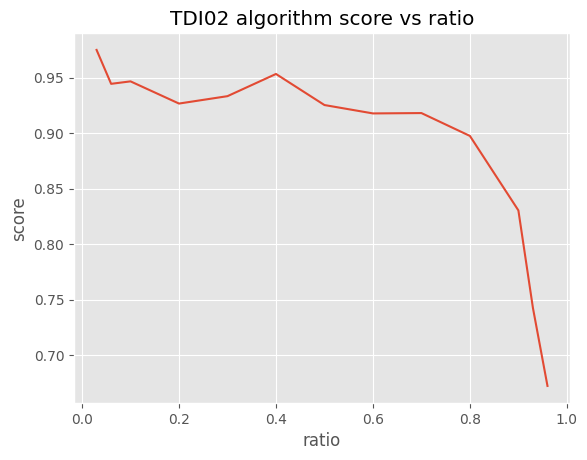

In [106]:
# prompt: plot a x-y figure using ratios and test_score

plt.plot(ratios, test_score)
plt.xlabel("ratio")
plt.ylabel("score")
plt.title("TDI02 algorithm score vs ratio")
plt.show()


This below is what I got when I run the code cell from above. You should get something similar, but not necessarily the same.

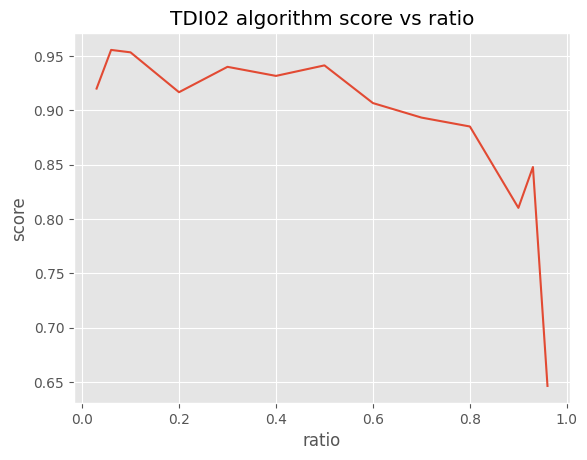

DONE:: Explain this figure above and the figure you get.

What is the score like when ratio is very low? The score is around 90% to 95% when the ratio is very low

What is score like when ratio is very high? The score when the ratio is around 0.8, the score is ~88%, it then sharply decreases form there down to ~65%.

What's the trend of score as ratio changes? Score at a ratio of 0.03 is 90%. From there as the artio increases the score begins to increase. After a ratio of 0.25, the score trends downwards, until it reaches ~68% at a ratio of 0.96

What lesson did you learn? I learned that training your algorithm is important to the performance of the algorithm. As shown above, as your training set becomes smaller and smaller (the testing set become larger and larger) the algorithm's accuracy decreases. Also, if your training set is too large the algorithm won't perform as well on test data either.


As a bonus for you, in the following code cell, I tested my ``Perfection'' decision tree. This decision tree supposedly score 100% on the training set.

In [107]:
# ratios = [0.9]
ratios = [0.9]

# test_score = []
# for ratio in ratios:
#     train_Xs, train_ys, test_Xs, test_ys = train_test_split_ratio(Xs, ys, ratio)
#     test_score.append(algorithmScoreTrainTest(TDI11_SP, train_Xs, train_ys, test_Xs, test_ys ))

# ratios = [0.03, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.93,0.96]
test_score = []
for ratio in ratios:
    average = 0
    for repeat in range(10):
        train_Xs, train_ys, test_Xs, test_ys = train_test_split_ratio(Xs, ys, ratio)
        average += algorithmScoreTrainTest(TDI11_SP, train_Xs, train_ys, test_Xs, test_ys )
    test_score.append(average/10)

branching feature and its value
2 1.7
Left: 
[array([5.5, 3.5, 1.3, 0.2]), array([4.6, 3.4, 1.4, 0.3]), array([5.1, 3.3, 1.7, 0.5]), array([5.4, 3.7, 1.5, 0.2]), array([5. , 3.3, 1.4, 0.2]), array([4.4, 3. , 1.3, 0.2]), array([5.4, 3.9, 1.3, 0.4])] [0, 0, 0, 0, 0, 0, 0]
Right: 
[array([6.2, 2.8, 4.8, 1.8]), array([5.8, 2.8, 5.1, 2.4]), array([5.6, 3. , 4.5, 1.5]), array([6.7, 3.3, 5.7, 2.5]), array([5.4, 3. , 4.5, 1.5]), array([5.6, 2.9, 3.6, 1.3]), array([6.7, 3.1, 4.4, 1.4]), array([6.4, 2.7, 5.3, 1.9])] [2, 2, 1, 2, 1, 1, 1, 2]
branching feature and its value
2 4.5
Left: 
[array([5.6, 3. , 4.5, 1.5]), array([5.4, 3. , 4.5, 1.5]), array([5.6, 2.9, 3.6, 1.3]), array([6.7, 3.1, 4.4, 1.4])] [1, 1, 1, 1]
Right: 
[array([6.2, 2.8, 4.8, 1.8]), array([5.8, 2.8, 5.1, 2.4]), array([6.7, 3.3, 5.7, 2.5]), array([6.4, 2.7, 5.3, 1.9])] [2, 2, 2, 2]
branching feature and its value
2 1.6
Left: 
[array([5.1, 3.5, 1.4, 0.3]), array([5. , 3.3, 1.4, 0.2]), array([5.2, 3.5, 1.5, 0.2]), array([5.7, 4.4, 

However, it scores poorly with the testing set with 0.6551470588235294, when the ratio is 0.9.  I didn't test on others because of technical difficulties in my ``perfect'' decision tree.

In [108]:
test_score

[0.8251851851851851]

DONE:: When my perfect tree test on ratio 0.9, its accuracy is 65%, but when my normal tree test on ratio 0.9, its accuracy is 80%. Explain why.
The perfect tree is performing poorly because it is overfit to the training set. It can perfectly classify all examples in the training set; however, when the algorithm attempts to classify examples never seen before, it does not perform well because it has made a tree specifically for the training set and not potential future test sets.

Another example that perfectionism is the reason why you can't be perfect.

Read:
https://www.apa.org/news/podcasts/speaking-of-psychology/perfectionism.html